# Case iFood - Data Analyst

📌 Este projeto é sobre um conjunto de dados real de uma campanha de marketing da empresa Ifood, uma grande plataforma de delivery de alimentos.
O objetivo central é realizar uma Análise Exploratória de Dados (EDA) para entender melhor o perfil dos clientes, seus hábitos de consumo e suas interações com campanhas de marketing.

Essa base de dados contém informações como:

Dados demográficos (idade, escolaridade, renda)

Comportamento de compra (gastos com diferentes produtos)

Engajamento com campanhas de marketing

Histórico de compras em diferentes canais (site, loja, catálogo).

### 📊 Análise Exploratória de Dados (EDA):

O que é Análise Exploratória de Dados (EDA)?
A Análise Exploratória de Dados (EDA - Exploratory Data Analysis) é uma etapa fundamental no processo de Ciência de Dados.
Seu principal objetivo é entender os padrões, tendências, comportamentos e possíveis problemas na base de dados antes de aplicar qualquer modelo de machine learning ou realizar inferências estatísticas.

📊 Por que a EDA é importante?
Identifica outliers, valores faltantes e erros de cadastro

Ajuda a entender a distribuição das variáveis

Permite gerar insights iniciais sobre o comportamento dos clientes

Facilita a escolha das melhores transformações e modelos posteriores

### Visão Geral do Processo no Projeto:
Importação da base de dados

Análise inicial da estrutura e tipos das variáveis

Tratamento de valores ausentes e outliers

Criação de novas variáveis derivadas

Visualizações para entender o comportamento dos clientes

Preparação dos dados para a clusterização final

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import DADOS_ORIGINAIS
from src.graficos import PALETTE, SCATTER_ALPHA

sns.set_theme(palette="bright")

In [2]:
df = pd.read_csv(DADOS_ORIGINAIS, sep="\t")

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,
    "display.max_columns",
    None,
):
    display(df.describe())

ID  Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
count  2240.00     2240.00   2216.00  2240.00   2240.00  2240.00   2240.00   
mean   5592.16     1968.81  52247.25     0.44      0.51    49.11    303.94   
std    3246.66       11.98  25173.08     0.54      0.54    28.96    336.60   
min       0.00     1893.00   1730.00     0.00      0.00     0.00      0.00   
25%    2828.25     1959.00  35303.00     0.00      0.00    24.00     23.75   
50%    5458.50     1970.00  51381.50     0.00      0.00    49.00    173.50   
75%    8427.75     1977.00  68522.00     1.00      1.00    74.00    504.25   
max   11191.00     1996.00 666666.00     2.00      2.00    99.00   1493.00   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count    2240.00          2240.00          2240.00           2240.00   
mean       26.30           166.95            37.53             27.06   
std        39.77           225.72            54.63             41.28   
min         0.00             0.00             0.00              0.00   
25%         1.00            16.00             3.00              1.00   
50%         8.00            67.00            12.00              8.00   
75%        33.00           232.00            50.00             33.00   
max       199.00          1725.00           259.00            263.00   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count       2240.00            2240.00          2240.00              2240.00   
mean          44.02               2.33             4.08                 2.66   
std           52.17               1.93             2.78                 2.92   
min            0.00               0.00             0.00                 0.00   
25%            9.00               1.00             2.00                 0.00   
50%           24.00               2.00             4.00                 2.00   
75%           56.00               3.00             6.00                 4.00   
max          362.00              15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2240.00            2240.00       2240.00       2240.00   
mean                5.79               5.32          0.07          0.07   
std                 3.25               2.43          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
count       2240.00       2240.00       2240.00   2240.00        2240.00   
mean           0.07          0.06          0.01      0.01           3.00   
std            0.26          0.25          0.11      0.10           0.00   
min            0.00          0.00          0.00      0.00           3.00   
25%            0.00          0.00          0.00      0.00           3.00   
50%            0.00          0.00          0.00      0.00           3.00   
75%            0.00          0.00          0.00      0.00           3.00   
max            1.00          1.00          1.00      1.00           3.00   

       Z_Revenue  Response  
count    2240.00   2240.00  
mean       11.00      0.15  
std         0.00      0.36  
min        11.00      0.00  
25%        11.00      0.00  
50%        11.00      0.00  
75%        11.00      0.00  
max        11.00      1.00

In [5]:
df.describe(exclude="number")

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

In [6]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [7]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
#from ydata_profiling import ProfileReport
#
#profile = ProfileReport(df)
#
#profile.to_file("../relatorios/eda_ifood.html")

### Estratégia de Tratamento de Dados Ausentes
Identificação: 24 das 2240 linhas (aprox. 1%) continham valores nulos.

Ação: As linhas com dados nulos foram removidas.

### Justificativa:
Impacto Mínimo: A pequena porcentagem de dados removidos não compromete a análise.

Simplicidade: Solução direta e eficiente, evitando a complexidade da imputação.

Integridade: Garante a validade e completude das relações entre as variáveis restantes.

In [11]:
print(df['Dt_Customer'].apply(type).value_counts()) # Mostra os tipos de dados de cada elemento

Dt_Customer
<class 'str'>    2240
Name: count, dtype: int64


In [12]:
df = df.dropna() # Explicação da estragia acima

df.loc[:, "Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y").dt.date

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [13]:
# Verifique o tipo antes
print("\nAntes da conversão:")
print(df["Dt_Customer"].dtype)
print(df["Dt_Customer"].head(2))

# Converter para datetime (usando dia-mês-ano)
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y", errors='coerce')

# Remover linhas com datas inválidas (NaT)
df = df.dropna(subset=["Dt_Customer"])

# Forçar o Pandas a reconfirmar o tipo
df["Dt_Customer"] = df["Dt_Customer"].astype("datetime64[ns]")

# Confirmar após conversão
print("\nDepois da conversão:")
print(df.info())
print(df["Dt_Customer"].head(2))


Antes da conversão:
object
0    2012-09-04
1    2014-03-08
Name: Dt_Customer, dtype: object

Depois da conversão:
<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [15]:
df["DaysSinceEnrolled"] = df["Dt_Customer"].max() - df["Dt_Customer"]
df["DaysSinceEnrolled"] = df["DaysSinceEnrolled"].dt.days

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  DaysSinceEnrolled  
0         11         1                663  
1         11         0                113  
2         11         0                312  
3         11         0                139  
4         11         0                161  

[5 rows x 30 columns]

In [16]:
df["YearsSinceEnrolled"] = df["DaysSinceEnrolled"] // 365
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   DaysSinceEnrolled  YearsSinceEnrolled  
0                663                   1  
1                113                   0  
2                312                   0  
3                139                   0  
4                161                   0  

[5 rows x 31 columns]

In [17]:
df["YearsSinceEnrolled"].value_counts()

YearsSinceEnrolled
0    1144
1    1072
Name: count, dtype: int64

In [18]:
df["Age"] = df["Dt_Customer"].max().year - df["Year_Birth"]

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0         0              3         11         1   
1             0         0              3         11         0   
2             0         0              3         11         0   
3             0         0              3         11         0   
4             0         0              3         11         0   

   DaysSinceEnrolled  YearsSinceEnrolled  Age  
0                663                   1   57  
1                113                   0   60  
2                312                   0   49  
3                139                   0   30  
4                161                   0   33  

[5 rows x 32 columns]

In [19]:
df["Age"].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [20]:
# grupos de idade
# adulto_jovem: 18-30
# adulto: 31-45
# adulto_senior: 46-60
# idoso: 61-

df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[18, 30, 45, 60, df["Age"].max()],
    labels=["18-30", "31-45", "46-60", "61+"],
    include_lowest=True,
)

In [21]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58       635  ...             0             0         0   
1  2014-03-08       38        11  ...             0             0         0   
2  2013-08-21       26       426  ...             0             0         0   
3  2014-02-10       26        11  ...             0             0         0   
4  2014-01-19       94       173  ...             0             0         0   

   Z_CostContact  Z_Revenue  Response  DaysSinceEnrolled  YearsSinceEnrolled  \
0              3         11         1                663                   1   
1              3         11         0                113                   0   
2              3         11         0                312                   0   
3              3         11         0                139                   0   
4              3         11         0                161                   0   

   Age  AgeGroup  
0   57     46-60  
1   60     46-60  
2   49     46-60  
3   30     18-30  
4   33     31-45  

[5 rows x 33 columns]

In [22]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             1   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
2235             0         0              3         11         0   
2236             0         0              3         11         0   
2237             0         0              3         11         0   
2238             0         0              3         11         0   
2239             0         0              3         11         1   

      DaysSinceEnrolled  YearsSinceEnrolled  Age  AgeGroup  
2235                381                   1   47     46-60  
2236                 19                   0   68       61+  
2237                155                   0   33     31-45  
2238                156                   0   58     46-60  
2239                622                   1   60     46-60  

[5 rows x 33 columns]

In [23]:
df[["Age", "AgeGroup"]][df["Age"] > 100].head()

Age AgeGroup
192  114      61+
239  121      61+
339  115      61+

In [24]:
df["AgeGroup"].value_counts()

AgeGroup
31-45    965
46-60    727
61+      267
18-30    257
Name: count, dtype: int64

In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'DaysSinceEnrolled', 'YearsSinceEnrolled', 'Age', 'AgeGroup'],
      dtype='object')

In [26]:
df.columns.str.startswith("Mnt")

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [27]:
df.columns[df.columns.str.startswith("Mnt")]

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [28]:
df.loc[:, df.columns.str.startswith("Mnt")]

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  
0               88  
1                6  
2               42  
3                5  
4               15  
...            ...  
2235           247  
2236             8  
2237            24  
2238            61  
2239            21  

[2216 rows x 6 columns]

In [29]:
df["MntTotal"] = (
    df["MntWines"]
    + df["MntFruits"]
    + df["MntMeatProducts"]
    + df["MntFishProducts"]
    + df["MntSweetProducts"]
    + df["MntGoldProds"]
)

df["MntRegularProds"] = df["MntTotal"] - df["MntGoldProds"]

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-09-04       58       635  ...         0              3         11   
1  2014-03-08       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-02-10       26        11  ...         0              3         11   
4  2014-01-19       94       173  ...         0              3         11   

   Response  DaysSinceEnrolled  YearsSinceEnrolled  Age  AgeGroup  MntTotal  \
0         1                663                   1   57     46-60      1617   
1         0                113                   0   60     46-60        27   
2         0                312                   0   49     46-60       776   
3         0                139                   0   30     18-30        53   
4         0                161                   0   33     31-45       422   

   MntRegularProds  
0             1529  
1               21  
2              734  
3               48  
4              407  

[5 rows x 35 columns]

In [30]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  \
2235         1  2013-06-13       46       709  ...         0              3   
2236         1  2014-06-10       56       406  ...         0              3   
2237         0  2014-01-25       91       908  ...         0              3   
2238         1  2014-01-24        8       428  ...         0              3   
2239         1  2012-10-15       40        84  ...         0              3   

      Z_Revenue  Response  DaysSinceEnrolled  YearsSinceEnrolled  Age  \
2235         11         0                381                   1   47   
2236         11         0                 19                   0   68   
2237         11         0                155                   0   33   
2238         11         0                156                   0   58   
2239         11         1                622                   1   60   

      AgeGroup  MntTotal  MntRegularProds  
2235     46-60      1341             1094  
2236       61+       444              436  
2237     31-45      1241             1217  
2238     46-60       843              782  
2239     46-60       172              151  

[5 rows x 35 columns]

In [31]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-09-04       58       635  ...              3         11         1   
1  2014-03-08       38        11  ...              3         11         0   
2  2013-08-21       26       426  ...              3         11         0   
3  2014-02-10       26        11  ...              3         11         0   
4  2014-01-19       94       173  ...              3         11         0   

   DaysSinceEnrolled  YearsSinceEnrolled  Age  AgeGroup  MntTotal  \
0                663                   1   57     46-60      1617   
1                113                   0   60     46-60        27   
2                312                   0   49     46-60       776   
3                139                   0   30     18-30        53   
4                161                   0   33     31-45       422   

   MntRegularProds  Children  
0             1529         0  
1               21         2  
2              734         0  
3               48         1  
4              407         1  

[5 rows x 36 columns]

In [32]:
df["HasChildren"] = df["Children"].apply(lambda x: 1 if x > 0 else 0)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  DaysSinceEnrolled  \
0  2012-09-04       58       635  ...         11         1                663   
1  2014-03-08       38        11  ...         11         0                113   
2  2013-08-21       26       426  ...         11         0                312   
3  2014-02-10       26        11  ...         11         0                139   
4  2014-01-19       94       173  ...         11         0                161   

   YearsSinceEnrolled  Age  AgeGroup  MntTotal  MntRegularProds  Children  \
0                   1   57     46-60      1617             1529         0   
1                   0   60     46-60        27               21         2   
2                   0   49     46-60       776              734         0   
3                   0   30     18-30        53               48         1   
4                   0   33     31-45       422              407         1   

   HasChildren  
0            0  
1            1  
2            0  
3            1  
4            1  

[5 rows x 37 columns]

In [33]:
df["HasChildren"].value_counts()

HasChildren
1    1583
0     633
Name: count, dtype: int64

In [34]:
df["Marital_Status"] = df["Marital_Status"].replace(
    {
        "Alone": "Single",
        "Absurd": "Single",
        "YOLO": "Single",
        "Together": "Partner",
        "Married": "Partner",
        "Widow": "Single",
        "Single": "Single",
        "Divorced": "Single",
    }
)

In [35]:
df["Marital_Status"].value_counts()

Marital_Status
Partner    1430
Single      786
Name: count, dtype: int64

Links sobre níveis educacionais:

- https://en.wikipedia.org/wiki/Educational_stage
- https://www.studyinternational.com/news/university-degrees-explained-terms-mean/
- https://www.dictionary.com/e/undergraduate-vs-graduate/
- https://en.wikipedia.org/wiki/Bologna_Process

In [36]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [37]:
df["AcceptedCmpTotal"] = (
    df["AcceptedCmp1"]
    + df["AcceptedCmp2"]
    + df["AcceptedCmp3"]
    + df["AcceptedCmp4"]
    + df["AcceptedCmp5"]
)

df["HasAcceptedCmp"] = df["AcceptedCmpTotal"].apply(lambda x: 1 if x > 0 else 0)

In [38]:
df["AcceptedCmpTotal"].value_counts()

AcceptedCmpTotal
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64

In [39]:
df["HasAcceptedCmp"].value_counts()

HasAcceptedCmp
0    1757
1     459
Name: count, dtype: int64

In [40]:
df.loc[:, df.columns.str.startswith("Num")]

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  
0                     4                  7  
1                     2                  5  
2                    10                  4  
3                     4                  6  
4                     6                  5  
...                 ...                ...  
2235                  4                  5  
2236                  5                  7  
2237                 13                  6  
2238                 10                  3  
2239                  4                  7  

[2216 rows x 5 columns]

In [41]:
df["NumTotalPurchases"] = (
    df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
)

df["NumTotalPurchases"].value_counts()

NumTotalPurchases
4     200
6     188
5     179
7     127
3     125
18    102
14     98
16     98
17     88
20     85
21     85
19     85
15     83
11     77
13     75
22     75
23     63
12     62
10     54
24     52
8      50
9      44
25     39
26     24
27     22
28     10
29      6
0       6
1       5
32      3
31      2
30      2
2       2
Name: count, dtype: int64

### Outliers
Outliers são valores extremos, muito diferentes da maioria dos dados em um conjunto.
Eles fogem do padrão, são os pontos "fora da curva".

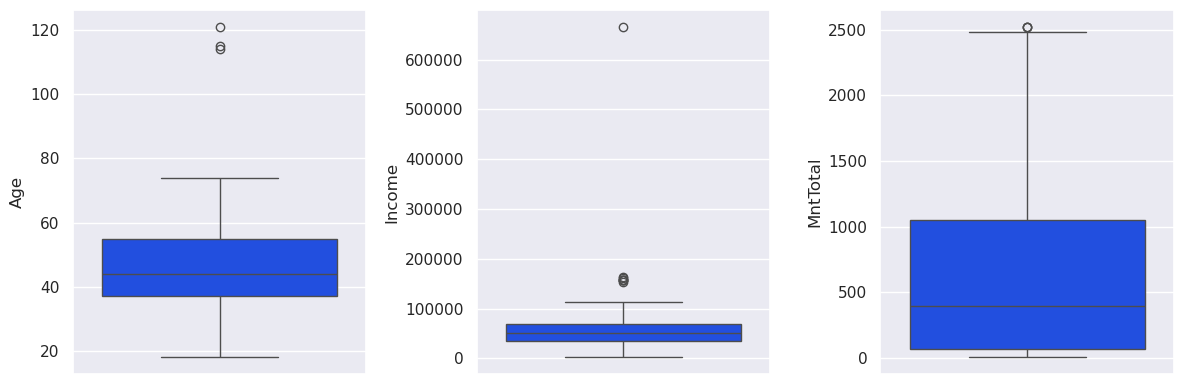

In [42]:
search_outliers = ["Age", "Income", "MntTotal"]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df, ax=axs[i])

plt.show()

In [43]:
df["Age"].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [44]:
from src.auxiliary import inspect_outliers

inspect_outliers(df, "Age")


Analisando a coluna 'Age':
Q1 (25%): 37.0
Q3 (75%): 55.0
IQR: 18.0
Limite inferior: 10.0
Limite superior: 82.0
Total de outliers encontrados: 3


ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle         Single  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD        Partner  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled  Age  AgeGroup  \
192  2013-09-26       99        15  ...                   0  114       61+   
239  2014-05-17       23         8  ...                   0  121       61+   
339  2013-09-26       36       755  ...                   0  115       61+   

     MntTotal  MntRegularProds  Children  HasChildren  AcceptedCmpTotal  \
192        65               40         1            1                 0   
239        22               20         1            1                 0   
339      1853             1629         0            0                 1   

     HasAcceptedCmp  NumTotalPurchases  
192               0                  5  
239               0                  3  
339               1                 14  

[3 rows x 40 columns]

In [45]:
df = df.drop(inspect_outliers(df, "Age").index)
df.info()


Analisando a coluna 'Age':
Q1 (25%): 37.0
Q3 (75%): 55.0
IQR: 18.0
Limite inferior: 10.0
Limite superior: 82.0
Total de outliers encontrados: 3
<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2213 non-null   int64         
 1   Year_Birth           2213 non-null   int64         
 2   Education            2213 non-null   object        
 3   Marital_Status       2213 non-null   object        
 4   Income               2213 non-null   float64       
 5   Kidhome              2213 non-null   int64         
 6   Teenhome             2213 non-null   int64         
 7   Dt_Customer          2213 non-null   datetime64[ns]
 8   Recency              2213 non-null   int64         
 9   MntWines             2213 non-null   int64         
 10  MntFruits            2213 non-null   int64         
 11  MntMeat

In [46]:
inspect_outliers(df, "Income")


Analisando a coluna 'Income':
Q1 (25%): 35246.0
Q3 (75%): 68487.0
IQR: 33241.0
Limite inferior: -14615.5
Limite superior: 118348.5
Total de outliers encontrados: 8


ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Partner  157243.0        0   
617    1503        1976         PhD        Partner  162397.0        1   
655    5555        1975  Graduation         Single  153924.0        0   
687    1501        1982         PhD        Partner  160803.0        0   
1300   5336        1971      Master        Partner  157733.0        1   
1653   4931        1977  Graduation        Partner  157146.0        0   
2132  11181        1949         PhD        Partner  156924.0        0   
2233   9432        1977  Graduation        Partner  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled  Age  \
164          1  2014-03-01       98        20  ...                   0   41   
617          1  2013-06-03       31        85  ...                   1   38   
655          0  2014-02-07       81         1  ...                   0   39   
687          0  2012-08-04       21        55  ...                   1   32   
1300         0  2013-06-04       37        39  ...                   1   43   
1653         0  2013-04-29       13         1  ...                   1   37   
2132         0  2013-08-29       85         2  ...                   0   65   
2233         0  2013-06-02       23         9  ...                   1   37   

      AgeGroup  MntTotal  MntRegularProds  Children  HasChildren  \
164      31-45      1608             1607         1            1   
617      31-45       107              105         2            1   
655      31-45         6                5         0            0   
687      31-45      1717             1713         0            0   
1300     31-45        59               51         1            1   
1653     31-45      1730             1729         0            0   
2132       61+         8                7         0            0   
2233     31-45        62               50         1            1   

      AcceptedCmpTotal  HasAcceptedCmp  NumTotalPurchases  
164                  0               0                 22  
617                  0               0                  1  
655                  0               0                  0  
687                  0               0                 29  
1300                 0               0                  2  
1653                 0               0                 28  
2132                 0               0                  0  
2233                 0               0                  7  

[8 rows x 40 columns]

In [47]:
df = df.drop(inspect_outliers(df, "Income").index)
df.info()


Analisando a coluna 'Income':
Q1 (25%): 35246.0
Q3 (75%): 68487.0
IQR: 33241.0
Limite inferior: -14615.5
Limite superior: 118348.5
Total de outliers encontrados: 8
<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64  

In [48]:
df["Income"].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

In [49]:
inspect_outliers(df, "MntTotal")


Analisando a coluna 'MntTotal':
Q1 (25%): 69.0
Q3 (75%): 1047.0
IQR: 978.0
Limite inferior: -1398.0
Limite superior: 2514.0
Total de outliers encontrados: 3


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1179  5735        1991      Master         Single  90638.0        0         0   
1492  1763        1988  Graduation        Partner  87679.0        0         0   
1572  5350        1991      Master         Single  90638.0        0         0   

     Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled  Age  AgeGroup  \
1179  2014-02-13       29      1156  ...                   0   23     18-30   
1492  2013-07-27       62      1259  ...                   0   26     18-30   
1572  2014-02-13       29      1156  ...                   0   23     18-30   

      MntTotal  MntRegularProds  Children  HasChildren  AcceptedCmpTotal  \
1179      2525             2429         0            0                 1   
1492      2524             2491         0            0                 3   
1572      2525             2429         0            0                 1   

      HasAcceptedCmp  NumTotalPurchases  
1179               1                 17  
1492               1                 28  
1572               1                 17  

[3 rows x 40 columns]

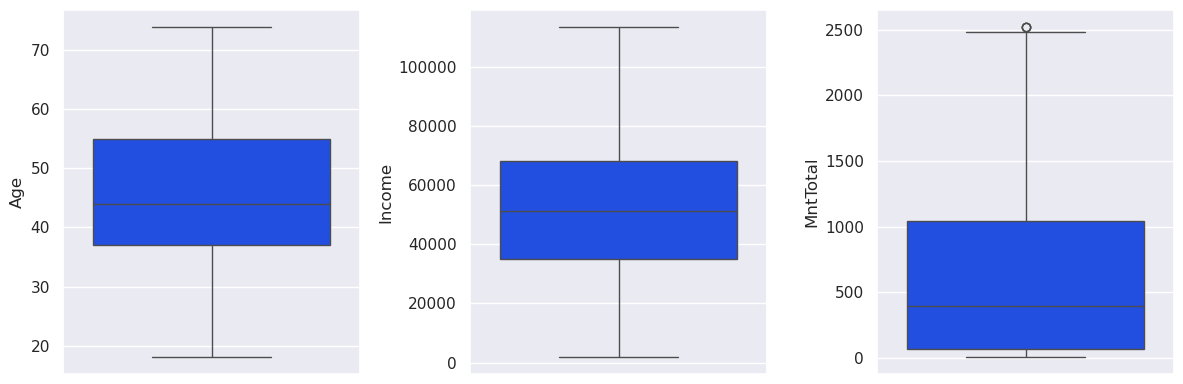

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df, ax=axs[i])

plt.show()

In [51]:
df = df.drop(["ID", "Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue"], axis=1)

df.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation        Partner  71613.0        0         0       26       426   
3  Graduation        Partner  26646.0        1         0       26        11   
4         PhD        Partner  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  YearsSinceEnrolled  Age  \
0         88              546              172  ...                   1   57   
1          1                6                2  ...                   0   60   
2         49              127              111  ...                   0   49   
3          4               20               10  ...                   0   30   
4         43              118               46  ...                   0   33   

   AgeGroup  MntTotal  MntRegularProds  Children  HasChildren  \
0     46-60      1617             1529         0            0   
1     46-60        27               21         2            1   
2     46-60       776              734         0            0   
3     18-30        53               48         1            1   
4     31-45       422              407         1            1   

   AcceptedCmpTotal  HasAcceptedCmp  NumTotalPurchases  
0                 0               0                 22  
1                 0               0                  4  
2                 0               0                 20  
3                 0               0                  6  
4                 0               0                 14  

[5 rows x 35 columns]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2205 non-null   object  
 1   Marital_Status       2205 non-null   object  
 2   Income               2205 non-null   float64 
 3   Kidhome              2205 non-null   int64   
 4   Teenhome             2205 non-null   int64   
 5   Recency              2205 non-null   int64   
 6   MntWines             2205 non-null   int64   
 7   MntFruits            2205 non-null   int64   
 8   MntMeatProducts      2205 non-null   int64   
 9   MntFishProducts      2205 non-null   int64   
 10  MntSweetProducts     2205 non-null   int64   
 11  MntGoldProds         2205 non-null   int64   
 12  NumDealsPurchases    2205 non-null   int64   
 13  NumWebPurchases      2205 non-null   int64   
 14  NumCatalogPurchases  2205 non-null   int64   
 15  NumStorePurchases    2205 

In [53]:
df.to_csv("../data/customers_new_features_and_drop.csv", index=False)

In [54]:
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,
    "display.max_columns",
    None,
):
    display(df.describe())

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count   2205.00  2205.00   2205.00  2205.00   2205.00    2205.00   
mean   51622.09     0.44      0.51    49.01    306.16      26.40   
std    20713.06     0.54      0.54    28.93    337.49      39.78   
min     1730.00     0.00      0.00     0.00      0.00       0.00   
25%    35196.00     0.00      0.00    24.00     24.00       2.00   
50%    51287.00     0.00      0.00    49.00    178.00       8.00   
75%    68281.00     1.00      1.00    74.00    507.00      33.00   
max   113734.00     2.00      2.00    99.00   1493.00     199.00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count          2205.00          2205.00           2205.00       2205.00   
mean            165.31            37.76             27.13         44.06   
std             217.78            54.82             41.13         51.74   
min               0.00             0.00              0.00          0.00   
25%              16.00             3.00              1.00          9.00   
50%              68.00            12.00              8.00         25.00   
75%             232.00            50.00             34.00         56.00   
max            1725.00           259.00            262.00        321.00   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count            2205.00          2205.00              2205.00   
mean                2.32             4.10                 2.65   
std                 1.89             2.74                 2.80   
min                 0.00             0.00                 0.00   
25%                 1.00             2.00                 0.00   
50%                 2.00             4.00                 2.00   
75%                 3.00             6.00                 4.00   
max                15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2205.00            2205.00       2205.00       2205.00   
mean                5.82               5.34          0.07          0.07   
std                 3.24               2.41          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
count       2205.00       2205.00       2205.00   2205.00   2205.00   
mean           0.07          0.06          0.01      0.01      0.15   
std            0.26          0.25          0.12      0.09      0.36   
min            0.00          0.00          0.00      0.00      0.00   
25%            0.00          0.00          0.00      0.00      0.00   
50%            0.00          0.00          0.00      0.00      0.00   
75%            0.00          0.00          0.00      0.00      0.00   
max            1.00          1.00          1.00      1.00      1.00   

       DaysSinceEnrolled  YearsSinceEnrolled     Age  MntTotal  \
count            2205.00             2205.00 2205.00   2205.00   
mean              353.72                0.48   45.10    606.82   
std               202.56                0.50   11.71    601.68   
min                 0.00                0.00   18.00      5.00   
25%               180.00                0.00   37.00     69.00   
50%               356.00                0.00   44.00    397.00   
75%               529.00                1.00   55.00   1047.00   
max               699.00                1.00   74.00   2525.00   

       MntRegularProds  Children  HasChildren  AcceptedCmpTotal  \
count          2205.00   2205.00      2205.00           2205.00   
mean            562.76      0.95         0.72              0.30   
std          

In [55]:
df.describe(exclude="number")

Education Marital_Status AgeGroup
count         2205           2205     2205
unique           5              2        4
top     Graduation        Partner    31-45
freq          1113           1422      958

### O pairplot?
O sns.pairplot() do Seaborn é uma forma de:

Plotar todas as combinações possíveis de gráficos de dispersão (scatterplots) entre um conjunto de variáveis numéricas.

A diagonal geralmente mostra um histograma ou um gráfico de densidade (KDE) de cada variável.

Com o parâmetro hue, você pode colorir os pontos de acordo com uma categoria (exemplo: "MaritalStatus" ou "HasChildren").

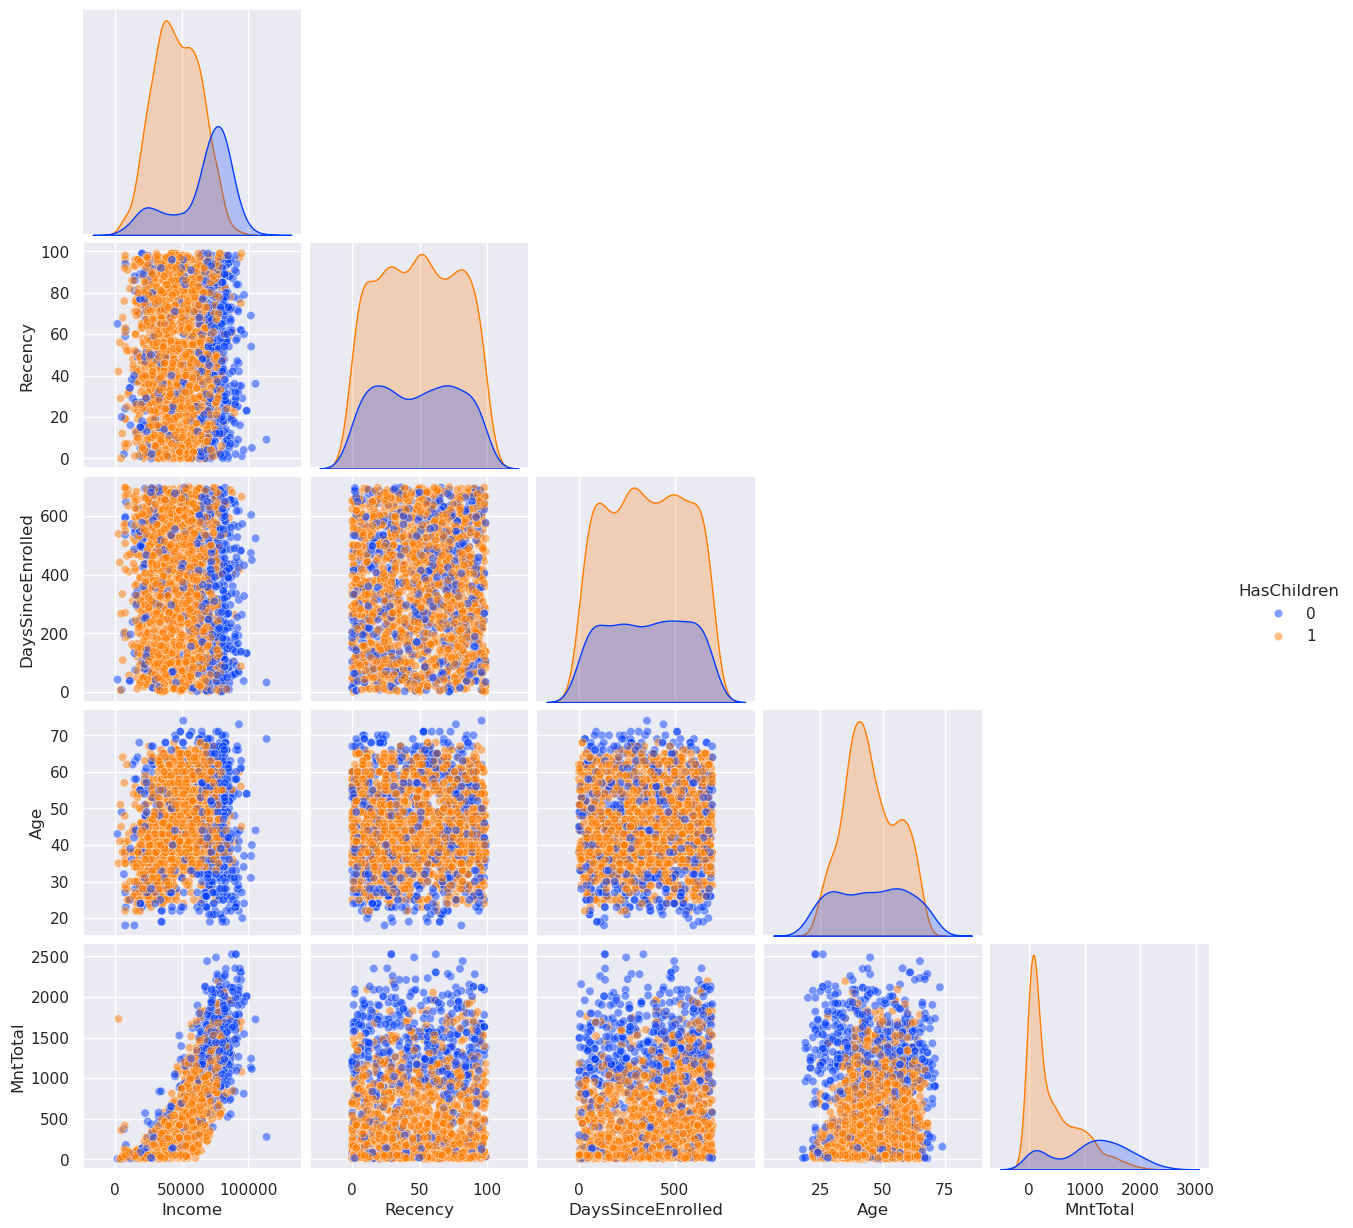

In [56]:
columns_analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
    "HasChildren",
]

sns.pairplot(
    df[columns_analysis],
    diag_kind="kde",
    hue="HasChildren",
    plot_kws=dict(alpha=0.5),
    corner=True,
)

In [57]:
columns_analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
]

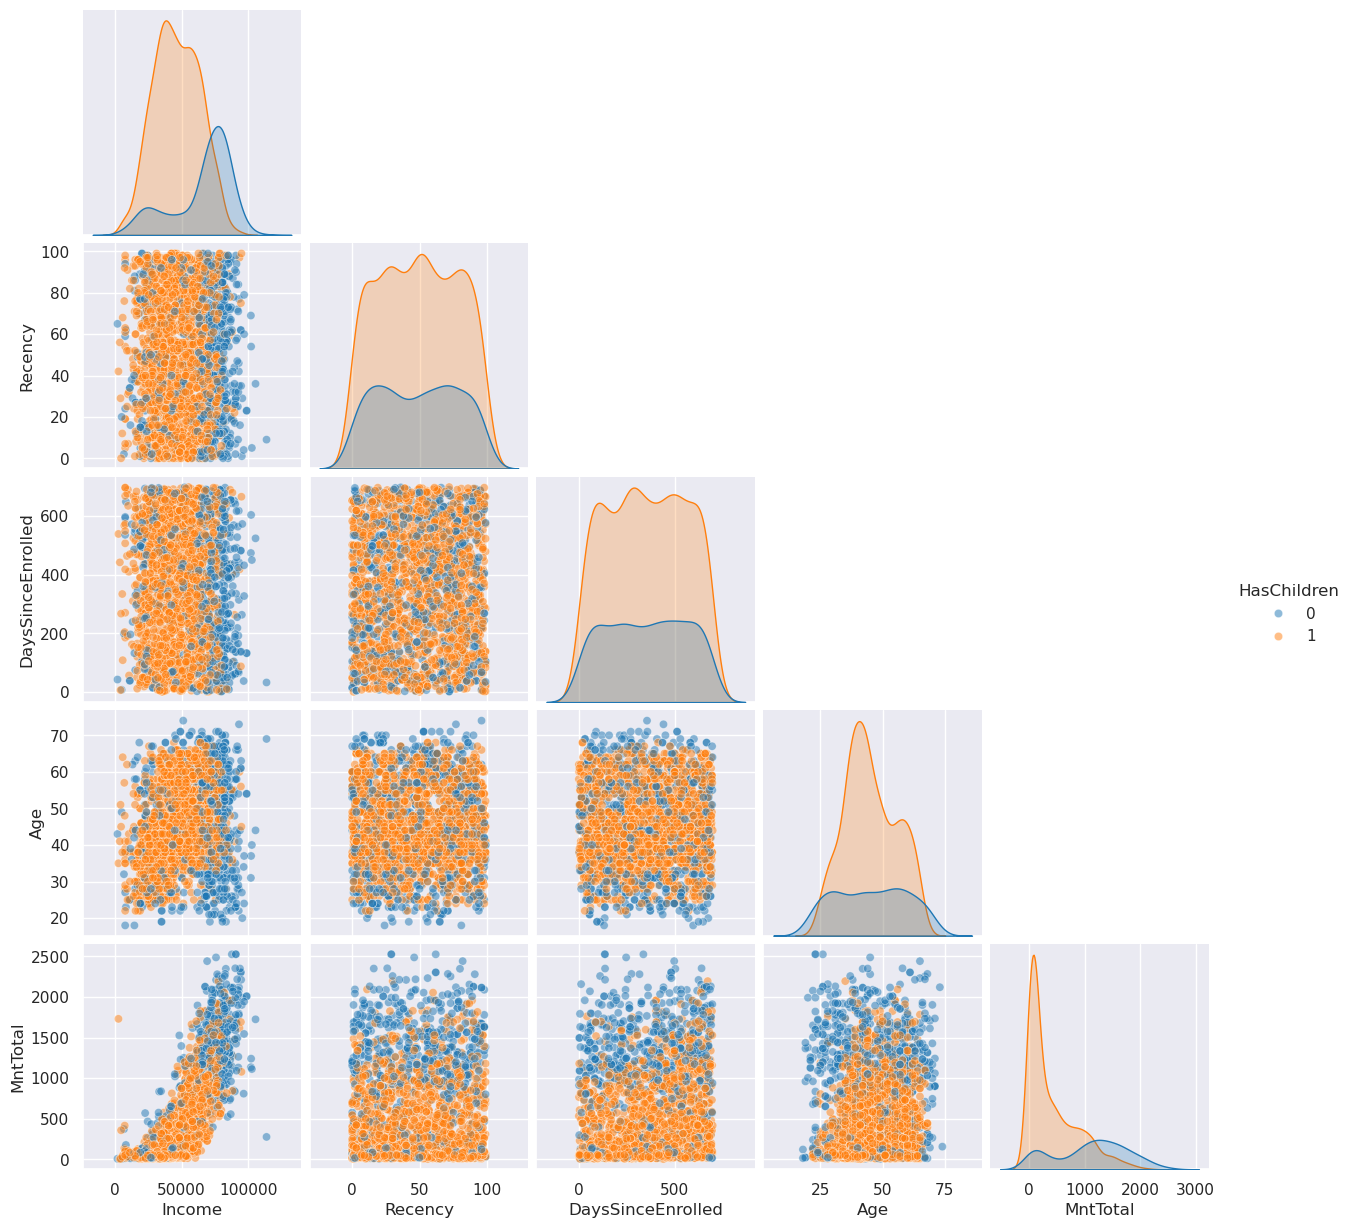

In [58]:
from src.auxiliary import pairplot

pairplot(df, columns_analysis, "HasChildren")

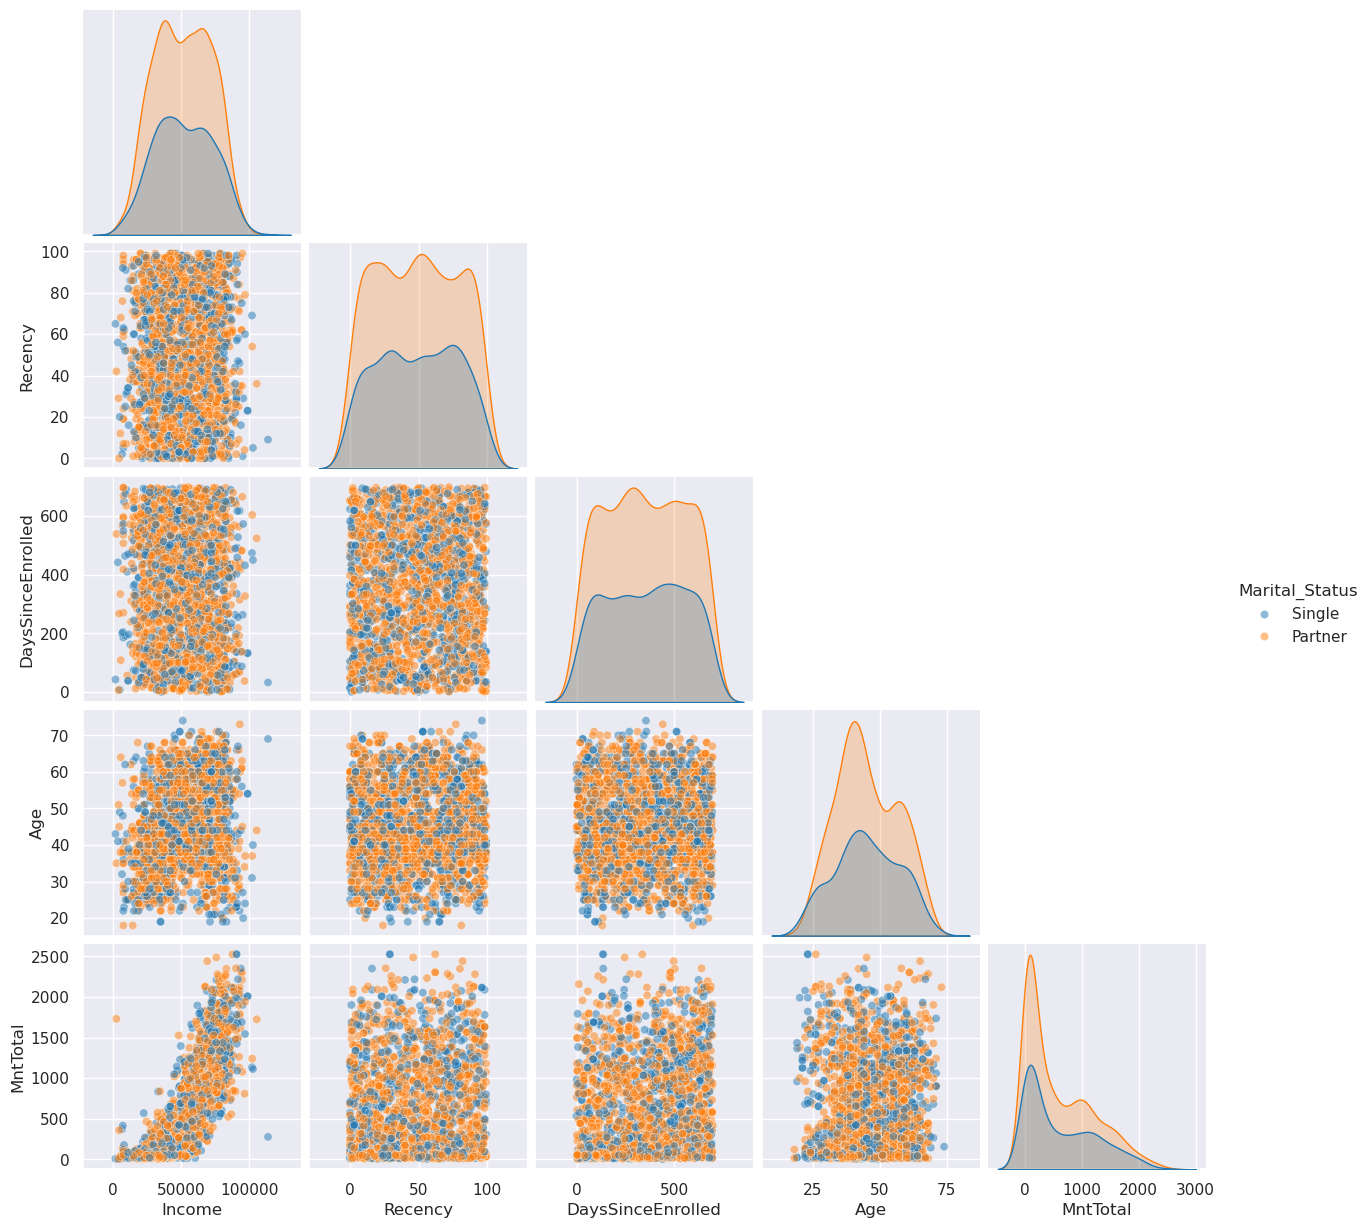

In [59]:
pairplot(df, columns_analysis, "Marital_Status")

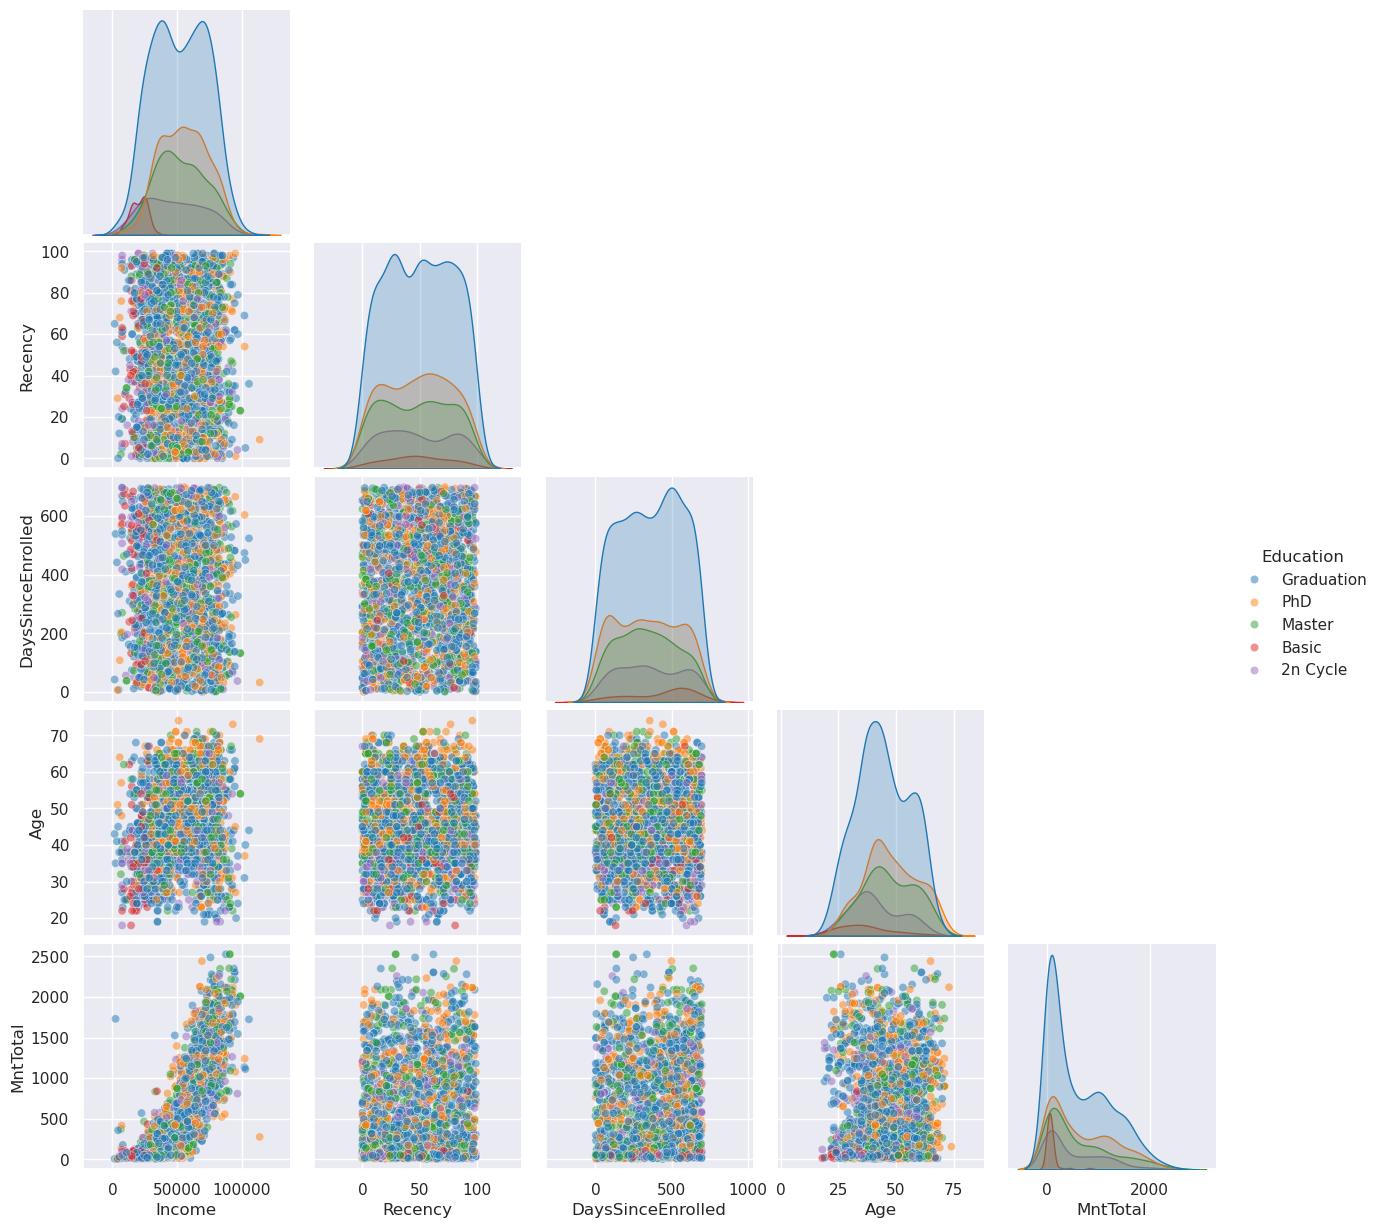

In [60]:
pairplot(df, columns_analysis, "Education")

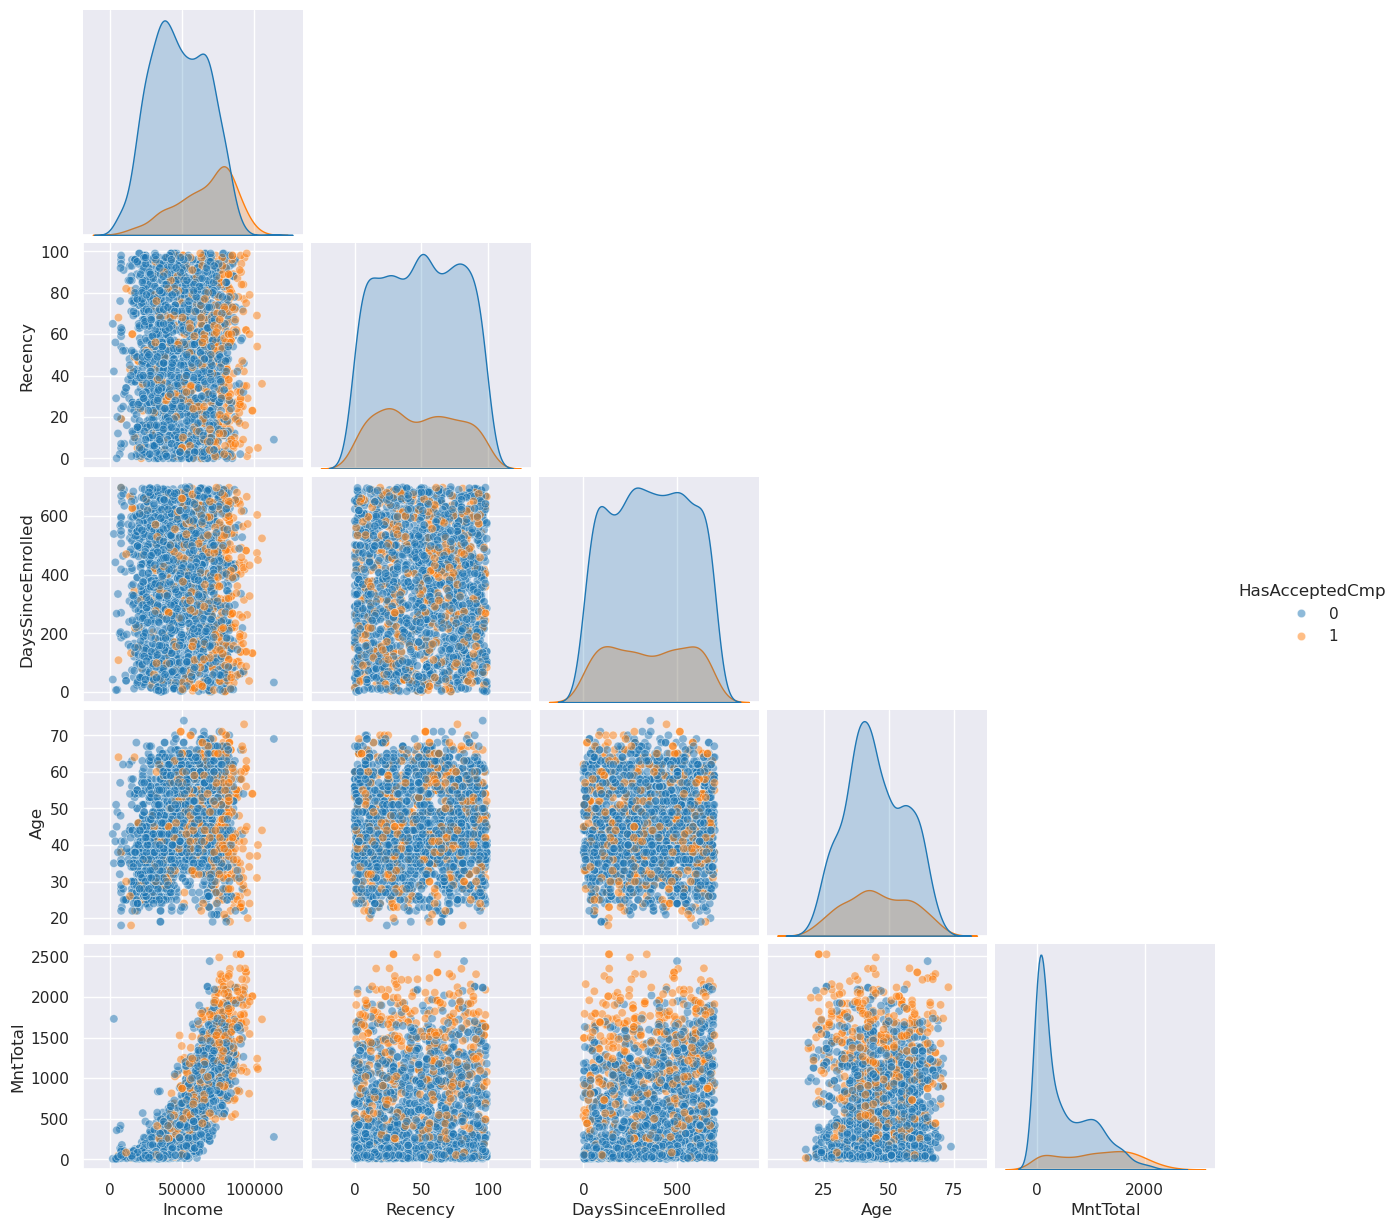

In [61]:
pairplot(df, columns_analysis, "HasAcceptedCmp")

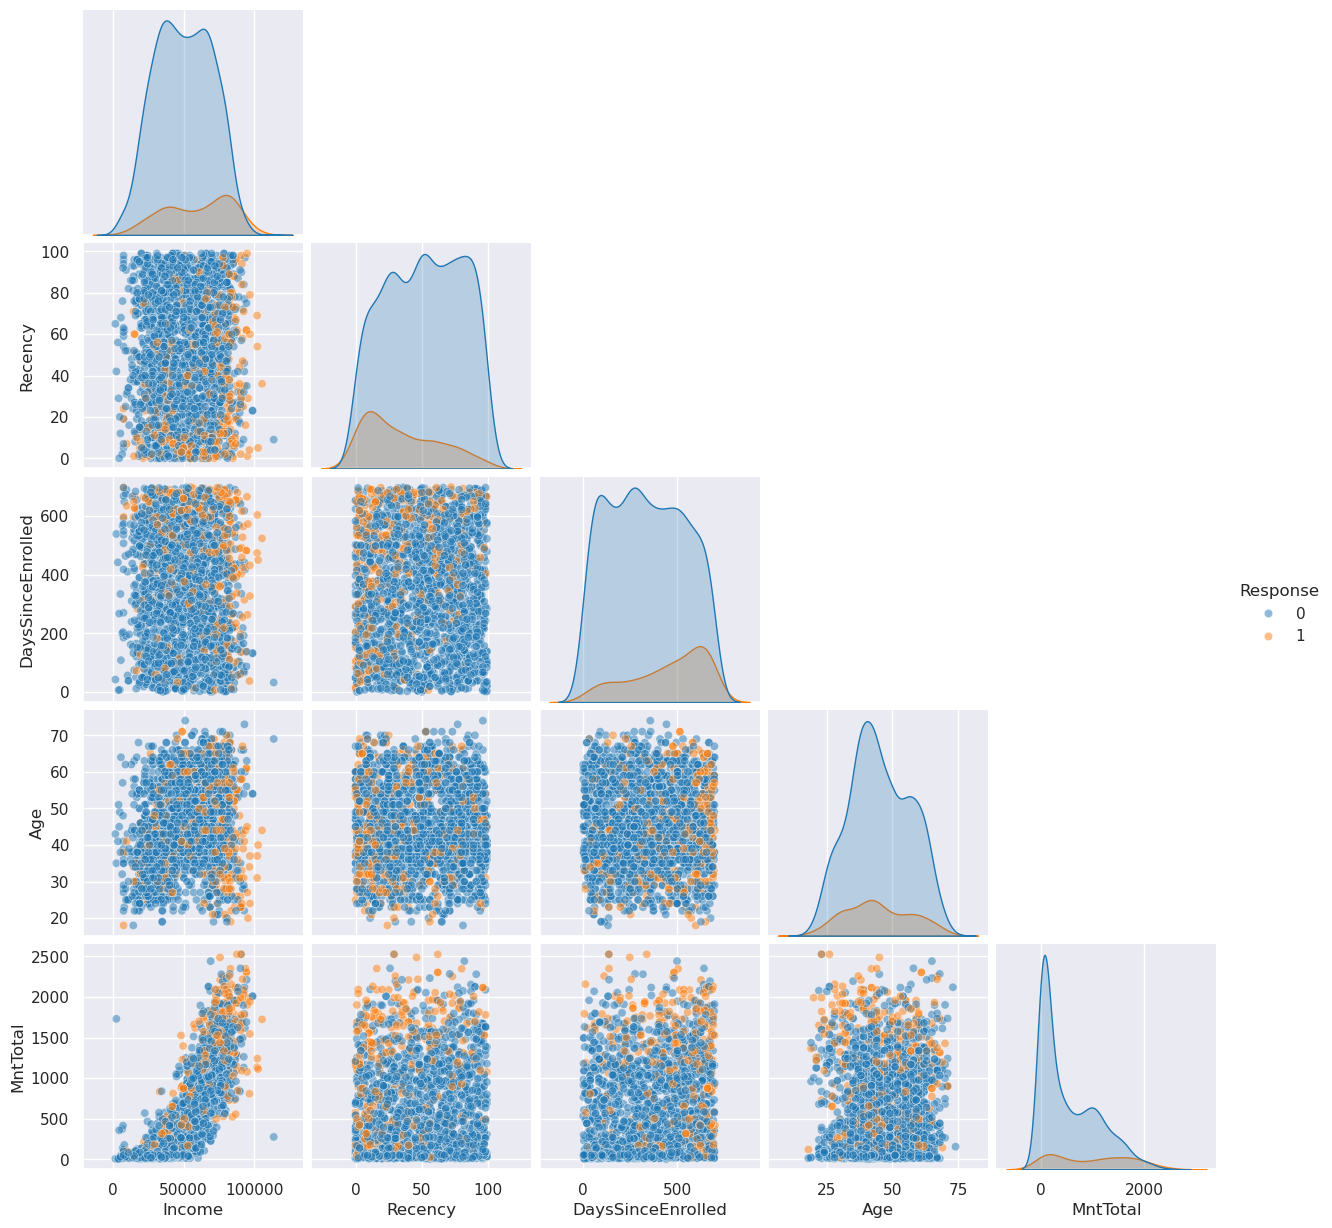

In [62]:
pairplot(df, columns_analysis, "Response")

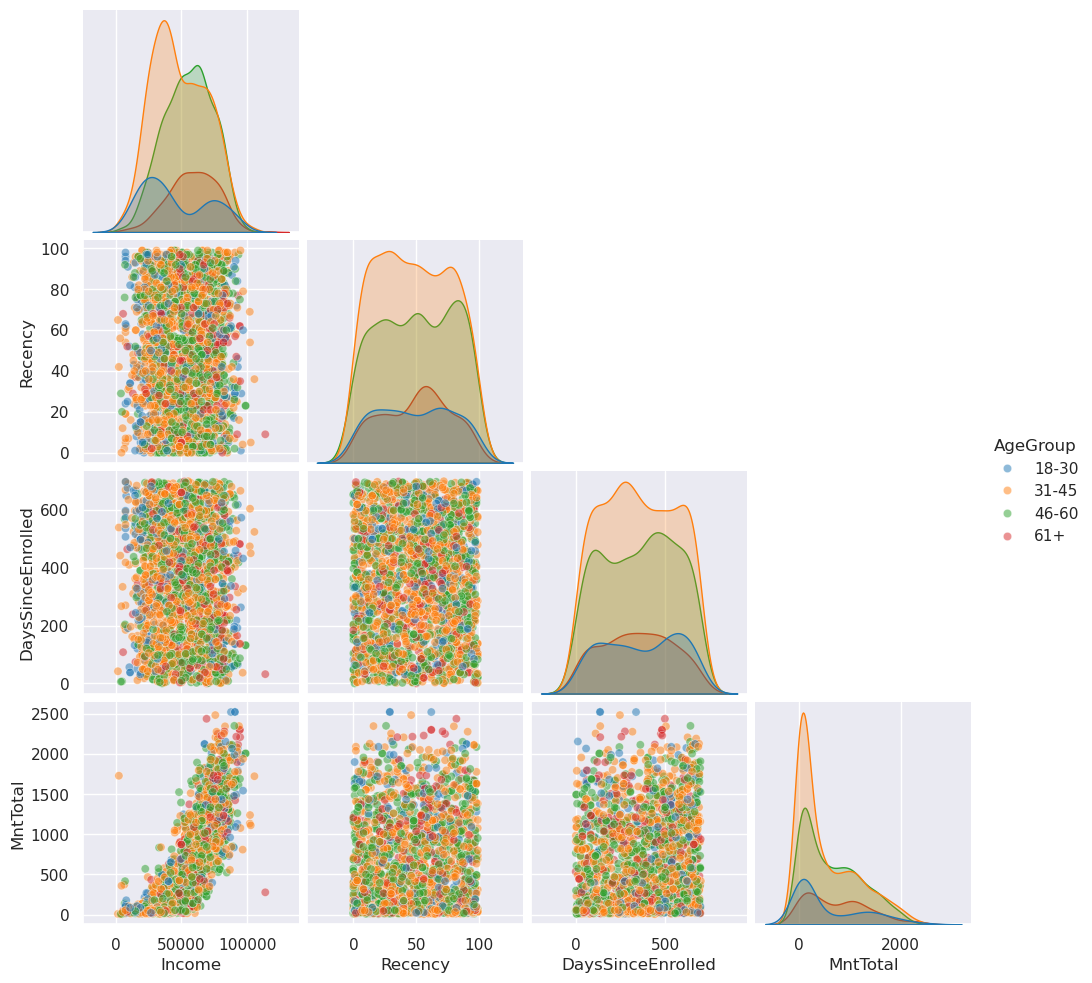

In [63]:
columns_analysis_without_age = columns_analysis.copy()
columns_analysis_without_age.remove("Age")

pairplot(df, columns_analysis_without_age, "AgeGroup")

<Axes: xlabel='Education', ylabel='Income'>

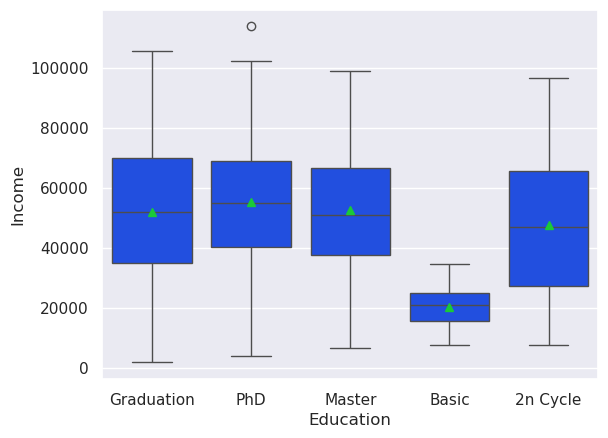

In [64]:
sns.boxplot(x="Education", y="Income", data=df, showmeans=True)

<Axes: xlabel='Education', ylabel='Income'>

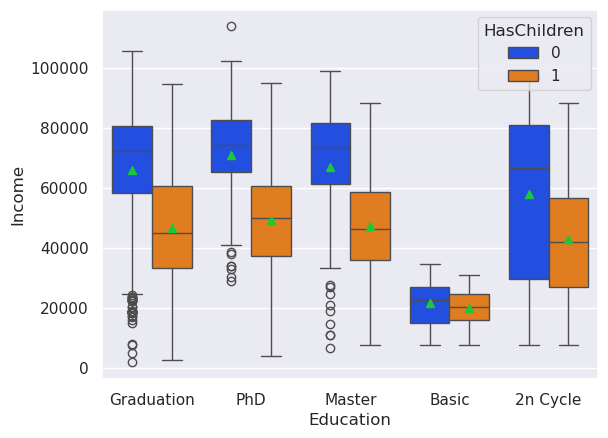

In [65]:
sns.boxplot(x="Education", y="Income", data=df, showmeans=True, hue="HasChildren")

<Axes: xlabel='Education', ylabel='Income'>

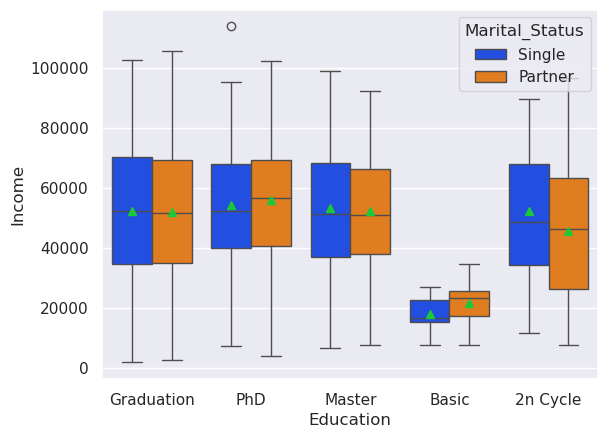

In [66]:
sns.boxplot(x="Education", y="Income", data=df, showmeans=True, hue="Marital_Status")

<Axes: xlabel='Education', ylabel='Income'>

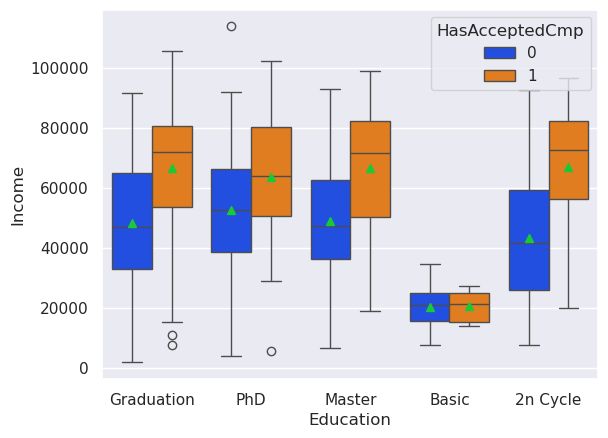

In [67]:
sns.boxplot(x="Education", y="Income", data=df, showmeans=True, hue="HasAcceptedCmp")

<Axes: xlabel='Education', ylabel='Income'>

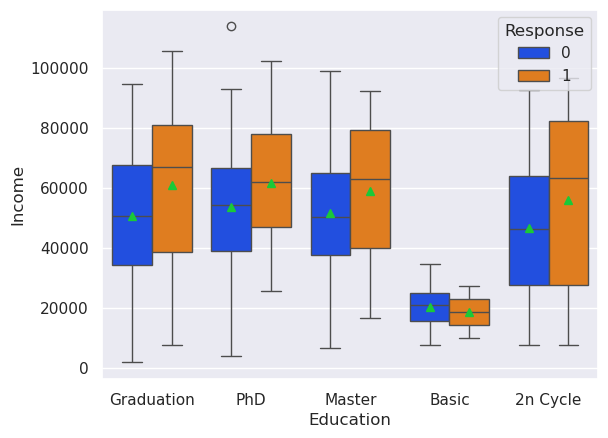

In [68]:
sns.boxplot(x="Education", y="Income", data=df, showmeans=True, hue="Response")

<Axes: xlabel='Education', ylabel='MntRegularProds'>

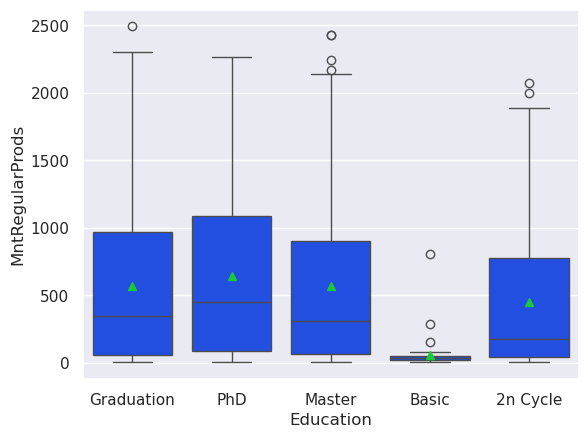

In [69]:
sns.boxplot(x="Education", y="MntRegularProds", data=df, showmeans=True)

<Axes: xlabel='Education', ylabel='MntGoldProds'>

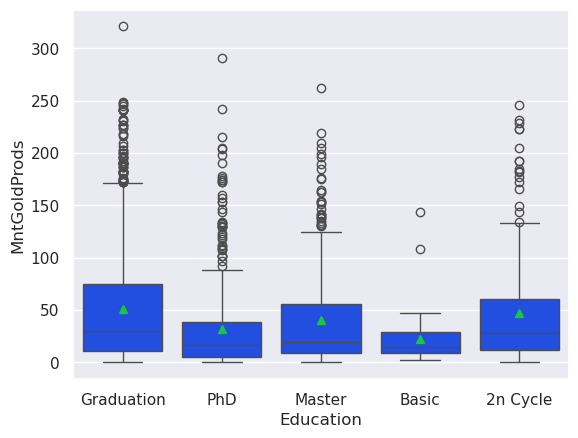

In [70]:
sns.boxplot(x="Education", y="MntGoldProds", data=df, showmeans=True)

<Axes: xlabel='AgeGroup', ylabel='Income'>

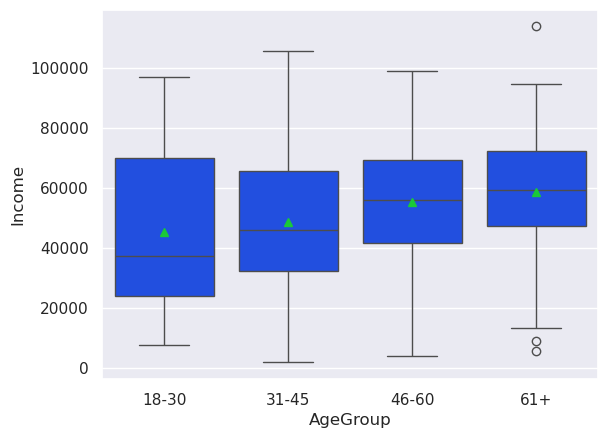

In [71]:
sns.boxplot(x="AgeGroup", y="Income", data=df, showmeans=True)

In [72]:
df_dummies = pd.get_dummies(df, dtype='uint8')
df_dummies.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_Basic  \
0              172                88            88  ...                0   
1                2                 1             6  ...                0   
2              111                21            42  ...                0   
3               10                 3             5  ...                0   
4               46                27            15  ...                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Partner  Marital_Status_Single  AgeGroup_18-30  \
0                       0                      1               0   
1                       0                      1               0   
2                       1                      0               0   
3                       1                      0               1   
4                       1                      0               0   

   AgeGroup_31-45  AgeGroup_46-60  AgeGroup_61+  
0               0               1             0  
1               0               1             0  
2               0               1             0  
3               0               0             0  
4               1               0             0  

[5 rows x 43 columns]

In [73]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Income                  2205 non-null   float64
 1   Kidhome                 2205 non-null   int64  
 2   Teenhome                2205 non-null   int64  
 3   Recency                 2205 non-null   int64  
 4   MntWines                2205 non-null   int64  
 5   MntFruits               2205 non-null   int64  
 6   MntMeatProducts         2205 non-null   int64  
 7   MntFishProducts         2205 non-null   int64  
 8   MntSweetProducts        2205 non-null   int64  
 9   MntGoldProds            2205 non-null   int64  
 10  NumDealsPurchases       2205 non-null   int64  
 11  NumWebPurchases         2205 non-null   int64  
 12  NumCatalogPurchases     2205 non-null   int64  
 13  NumStorePurchases       2205 non-null   int64  
 14  NumWebVisitsMonth       2205 non-null   int64

In [74]:
df_dummies.to_csv("../data/customers_new_features_and_drop_DUMMIES.csv", index=False)

In [75]:
df_dummies_corr = df_dummies.corr()
df_dummies_corr

Income   Kidhome  Teenhome   Recency  MntWines  \
Income                  1.000000 -0.531699  0.042483  0.006716  0.730495   
Kidhome                -0.531699  1.000000 -0.040207  0.011829 -0.499288   
Teenhome                0.042483 -0.040207  1.000000  0.013881  0.002783   
Recency                 0.006716  0.011829  0.013881  1.000000  0.016470   
MntWines                0.730495 -0.499288  0.002783  0.016470  1.000000   
MntFruits               0.537920 -0.374388 -0.176925 -0.004909  0.384947   
MntMeatProducts         0.702500 -0.445665 -0.267177  0.026138  0.593119   
MntFishProducts         0.551758 -0.389895 -0.206371  0.001177  0.395967   
MntSweetProducts        0.555601 -0.379101 -0.164246  0.025535  0.388613   
MntGoldProds            0.417653 -0.356550 -0.019619  0.018558  0.390194   
NumDealsPurchases      -0.132427  0.226434  0.394341  0.000479  0.011858   
NumWebPurchases         0.503184 -0.375590  0.161229 -0.005104  0.552342   
NumCatalogPurchases     0.710057 -0.519813 -0.114019  0.029750  0.673234   
NumStorePurchases       0.687206 -0.506543  0.047321  0.000462  0.639373   
NumWebVisitsMonth      -0.648306  0.448497  0.129365 -0.017906 -0.329395   
AcceptedCmp3           -0.011181  0.015897 -0.043223 -0.032327  0.060700   
AcceptedCmp4            0.233267 -0.162597  0.037860  0.017658  0.373063   
AcceptedCmp5            0.416386 -0.205124 -0.190760  0.000334  0.472729   
AcceptedCmp1            0.345242 -0.174741 -0.145748 -0.021097  0.351346   
AcceptedCmp2            0.110210 -0.082124 -0.015805 -0.001390  0.206231   
Complain               -0.027488  0.037025  0.007633  0.005758 -0.036709   
Response                0.174902 -0.078409 -0.155196 -0.200413  0.245559   
DaysSinceEnrolled      -0.024892 -0.055743  0.019394  0.028338  0.168102   
YearsSinceEnrolled     -0.002489 -0.046984  0.015813  0.030129  0.149257   
Age                     0.212625 -0.238083  0.362919  0.014228  0.164438   
MntTotal                0.823770 -0.558234 -0.138565  0.021824  0.897262   
MntRegularProds         0.823066 -0.551152 -0.142995  0.021132  0.902310   
Children               -0.350313  0.687697  0.697760  0.018566 -0.355922   
HasChildren            -0.410545  0.519610  0.587361  0.002109 -0.345055   
AcceptedCmpTotal        0.388247 -0.212080 -0.130255 -0.013344  0.509913   
HasAcceptedCmp          0.336105 -0.203011 -0.100674 -0.016200  0.463465   
NumTotalPurchases       0.778849 -0.574489  0.038391  0.009858  0.761642   
Education_2n Cycle     -0.060621  0.019050 -0.056259 -0.006789 -0.096259   
Education_Basic        -0.239604  0.055308 -0.120519 -0.003093 -0.140369   
Education_Graduation    0.017644 -0.001930 -0.024698  0.031419 -0.060920   
Education_Master        0.021633  0.011482  0.023806 -0.025563  0.036403   
Education_PhD           0.091176 -0.042031  0.092901 -0.009234  0.160804   
Marital_Status_Partner -0.012405  0.026868  0.032473  0.000364 -0.007418   
Marital_Status_Single   0.012405 -0.026868 -0.032473 -0.000364  0.007418   
AgeGroup_18-30         -0.112011  0.064113 -0.338075  0.001254 -0.069436   
AgeGroup_31-45         -0.126099  0.213639 -0.124902 -0.032791 -0.103705   
AgeGroup_46-60          0.123550 -0.167900  0.311466  0.027028  0.088864   
AgeGroup_61+            0.124547 -0.146678  0.073968  0.009705  0.098456   

                        MntFruits  MntMeatProducts  MntFishProducts  \
Income                   0.537920         0.702500         0.551758   
Kidhome                 -0.374388        -0.445665        -0.389895   
Teenhome                -0.176925        -0.267177        -0.206371   
Recency                 -0.004909         0.026138         0.001177   
MntWines                 0.384947         0.593119         0.395967   
MntFruits                1.000000         0.568100         0.592556   
MntMeatProducts          0.568100         1.000000         0.595673   
MntFishProducts          0.592556         0.595673         1.000000   
MntSweetProducts         0.570986         

<Axes: >

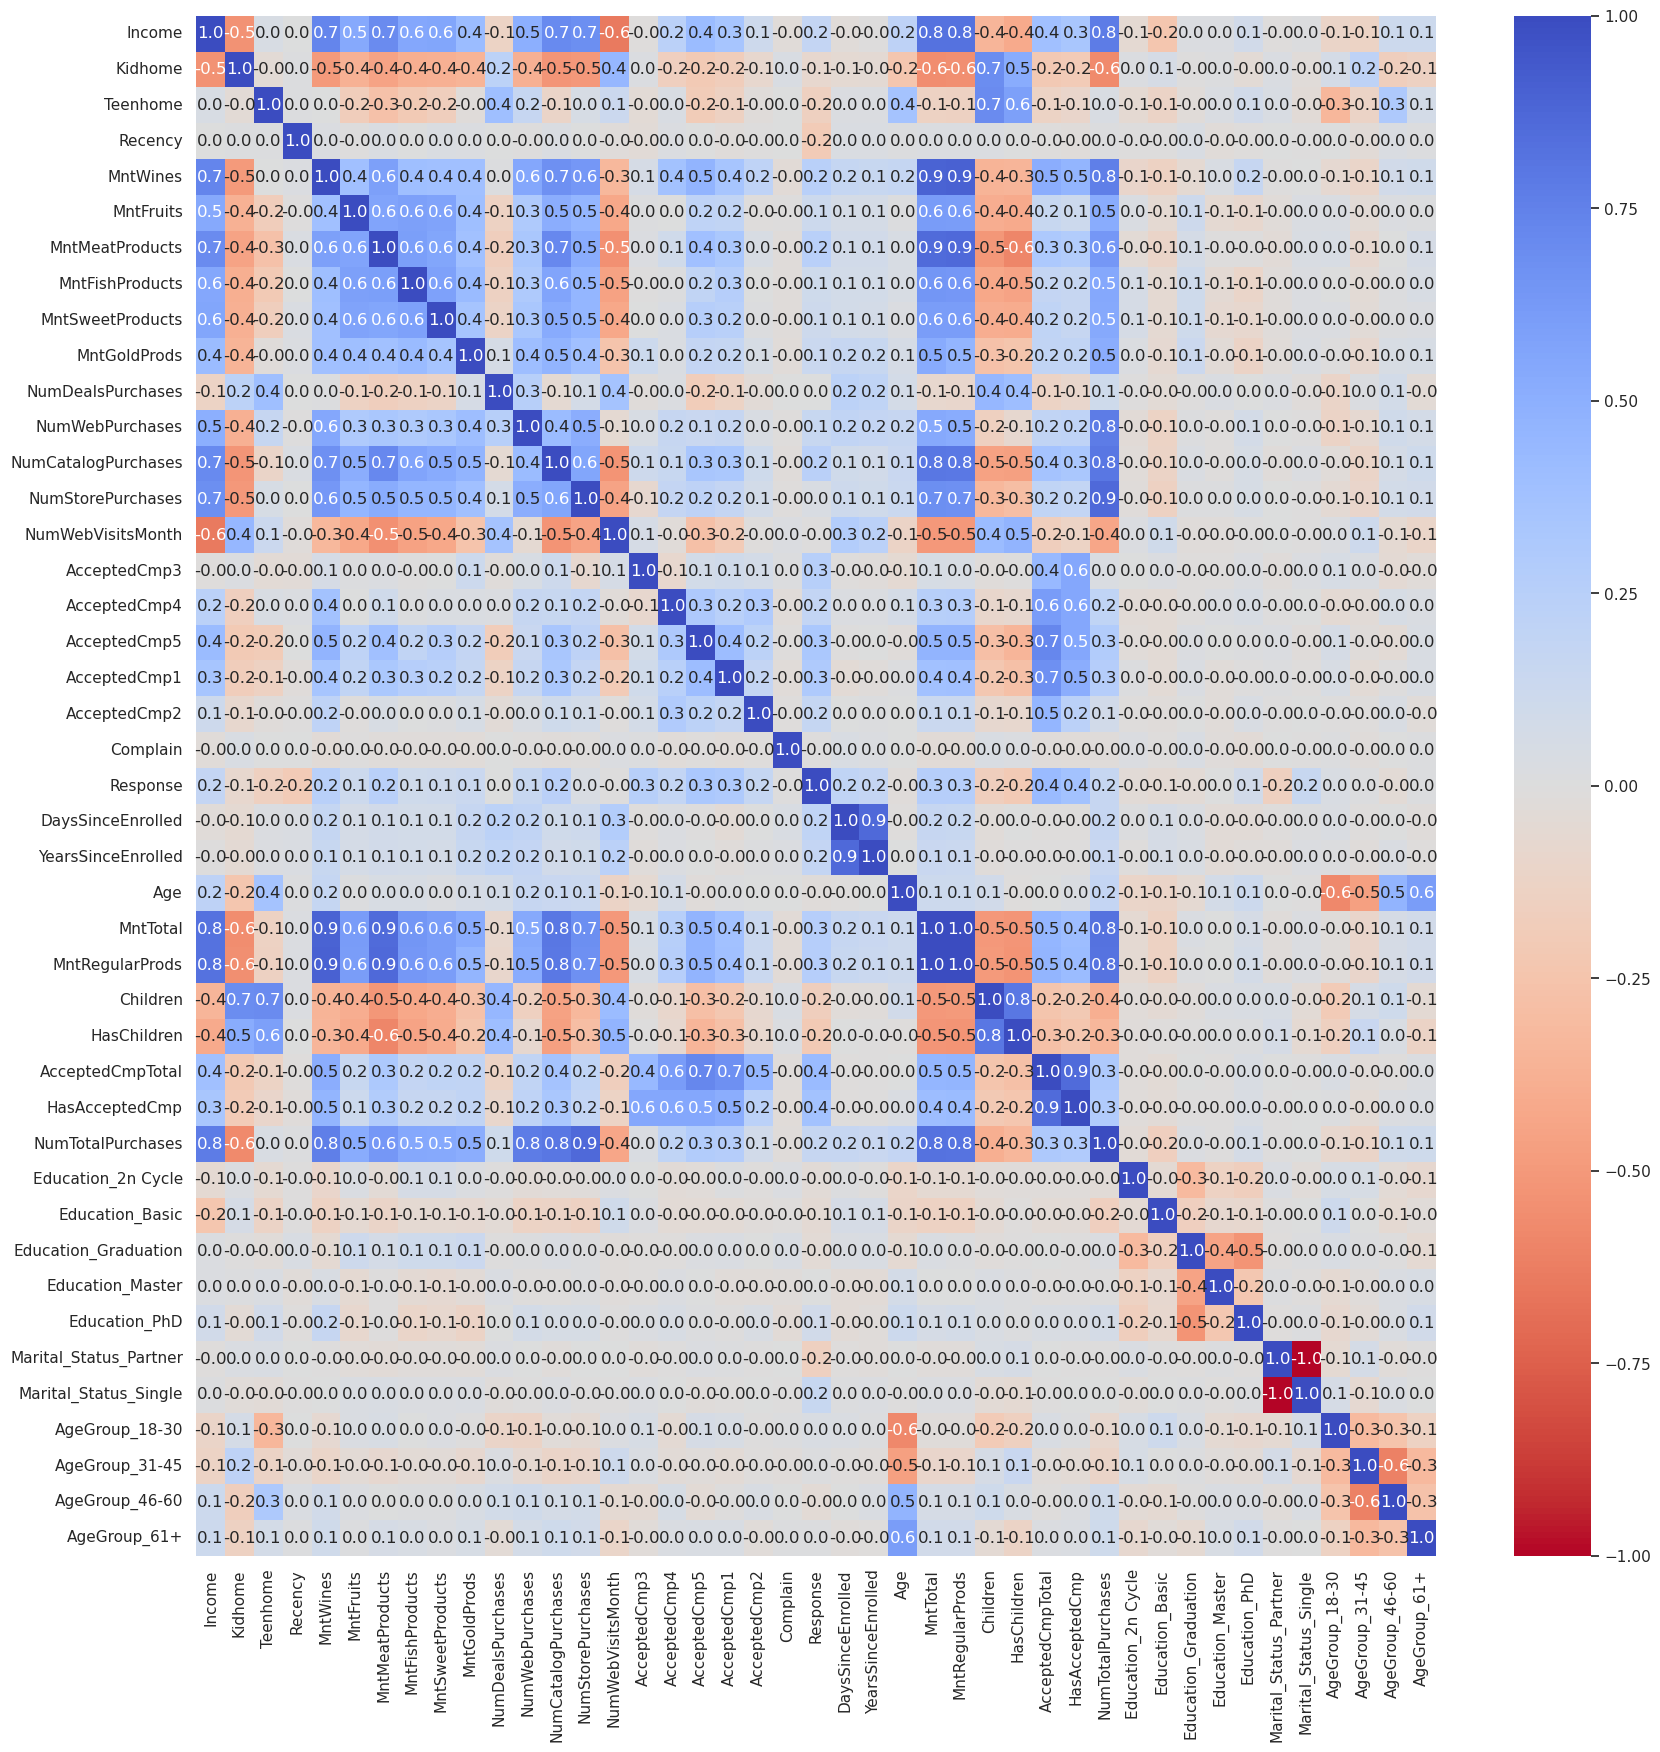

In [76]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df_dummies_corr, annot=True, ax=ax, fmt=".1f", cmap="coolwarm_r")

In [77]:
df_dummies_corr.head()

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
Income    1.000000 -0.531699  0.042483  0.006716  0.730495   0.537920   
Kidhome  -0.531699  1.000000 -0.040207  0.011829 -0.499288  -0.374388   
Teenhome  0.042483 -0.040207  1.000000  0.013881  0.002783  -0.176925   
Recency   0.006716  0.011829  0.013881  1.000000  0.016470  -0.004909   
MntWines  0.730495 -0.499288  0.002783  0.016470  1.000000   0.384947   

          MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Income           0.702500         0.551758          0.555601      0.417653   
Kidhome         -0.445665        -0.389895         -0.379101     -0.356550   
Teenhome        -0.267177        -0.206371         -0.164246     -0.019619   
Recency          0.026138         0.001177          0.025535      0.018558   
MntWines         0.593119         0.395967          0.388613      0.390194   

          ...  Education_Basic  Education_Graduation  Education_Master  \
Income    ...        -0.239604              0.017644          0.021633   
Kidhome   ...         0.055308             -0.001930          0.011482   
Teenhome  ...        -0.120519             -0.024698          0.023806   
Recency   ...        -0.003093              0.031419         -0.025563   
MntWines  ...        -0.140369             -0.060920          0.036403   

          Education_PhD  Marital_Status_Partner  Marital_Status_Single  \
Income         0.091176               -0.012405               0.012405   
Kidhome       -0.042031                0.026868              -0.026868   
Teenhome       0.092901                0.032473              -0.032473   
Recency       -0.009234                0.000364              -0.000364   
MntWines       0.160804               -0.007418               0.007418   

          AgeGroup_18-30  AgeGroup_31-45  AgeGroup_46-60  AgeGroup_61+  
Income         -0.112011       -0.126099        0.123550      0.124547  
Kidhome         0.064113        0.213639       -0.167900     -0.146678  
Teenhome       -0.338075       -0.124902        0.311466      0.073968  
Recency         0.001254       -0.032791        0.027028      0.009705  
MntWines       -0.069436       -0.103705        0.088864      0.098456  

[5 rows x 43 columns]

In [78]:
df_dummies_corr_unstack = pd.DataFrame(df_dummies_corr.unstack())
df_dummies_corr_unstack = df_dummies_corr_unstack.rename(columns={0: "corr"})
df_dummies_corr_unstack.head(30)

corr
Income Income               1.000000
       Kidhome             -0.531699
       Teenhome             0.042483
       Recency              0.006716
       MntWines             0.730495
       MntFruits            0.537920
       MntMeatProducts      0.702500
       MntFishProducts      0.551758
       MntSweetProducts     0.555601
       MntGoldProds         0.417653
       NumDealsPurchases   -0.132427
       NumWebPurchases      0.503184
       NumCatalogPurchases  0.710057
       NumStorePurchases    0.687206
       NumWebVisitsMonth   -0.648306
       AcceptedCmp3        -0.011181
       AcceptedCmp4         0.233267
       AcceptedCmp5         0.416386
       AcceptedCmp1         0.345242
       AcceptedCmp2         0.110210
       Complain            -0.027488
       Response             0.174902
       DaysSinceEnrolled   -0.024892
       YearsSinceEnrolled  -0.002489
       Age                  0.212625
       MntTotal             0.823770
       MntRegularProds      0.823066
       Children            -0.350313
       HasChildren         -0.410545
       AcceptedCmpTotal     0.388247

In [79]:
df_dummies_corr_unstack.loc["Income"].sort_values(by="corr")

corr
NumWebVisitsMonth      -0.648306
Kidhome                -0.531699
HasChildren            -0.410545
Children               -0.350313
Education_Basic        -0.239604
NumDealsPurchases      -0.132427
AgeGroup_31-45         -0.126099
AgeGroup_18-30         -0.112011
Education_2n Cycle     -0.060621
Complain               -0.027488
DaysSinceEnrolled      -0.024892
Marital_Status_Partner -0.012405
AcceptedCmp3           -0.011181
YearsSinceEnrolled     -0.002489
Recency                 0.006716
Marital_Status_Single   0.012405
Education_Graduation    0.017644
Education_Master        0.021633
Teenhome                0.042483
Education_PhD           0.091176
AcceptedCmp2            0.110210
AgeGroup_46-60          0.123550
AgeGroup_61+            0.124547
Response                0.174902
Age                     0.212625
AcceptedCmp4            0.233267
HasAcceptedCmp          0.336105
AcceptedCmp1            0.345242
AcceptedCmpTotal        0.388247
AcceptedCmp5            0.416386
MntGoldProds            0.417653
NumWebPurchases         0.503184
MntFruits               0.537920
MntFishProducts         0.551758
MntSweetProducts        0.555601
NumStorePurchases       0.687206
MntMeatProducts         0.702500
NumCatalogPurchases     0.710057
MntWines                0.730495
NumTotalPurchases       0.778849
MntRegularProds         0.823066
MntTotal                0.823770
Income                  1.000000

In [80]:
df_dummies_corr_unstack.loc["Age"].sort_values(by="corr")

corr
AgeGroup_18-30         -0.580462
AgeGroup_31-45         -0.464348
Kidhome                -0.238083
NumWebVisitsMonth      -0.122713
Education_Basic        -0.115872
Education_2n Cycle     -0.104364
Education_Graduation   -0.061579
AcceptedCmp3           -0.061405
Response               -0.021305
AcceptedCmp5           -0.019275
DaysSinceEnrolled      -0.013462
HasChildren            -0.012013
Marital_Status_Single  -0.003800
AcceptedCmpTotal        0.001529
Marital_Status_Partner  0.003800
YearsSinceEnrolled      0.003869
Complain                0.004531
AcceptedCmp2            0.007737
AcceptedCmp1            0.011747
MntFruits               0.013149
Recency                 0.014228
MntSweetProducts        0.021075
HasAcceptedCmp          0.030203
MntFishProducts         0.040855
MntMeatProducts         0.041540
MntGoldProds            0.059295
AcceptedCmp4            0.069903
NumDealsPurchases       0.072005
Education_Master        0.074754
Children                0.093007
MntRegularProds         0.118370
MntTotal                0.118404
Education_PhD           0.123429
NumStorePurchases       0.138614
NumCatalogPurchases     0.140724
NumWebPurchases         0.161839
MntWines                0.164438
NumTotalPurchases       0.179130
Income                  0.212625
Teenhome                0.362919
AgeGroup_46-60          0.469812
AgeGroup_61+            0.603412
Age                     1.000000

In [81]:
df_dummies_corr_unstack.loc["MntTotal"].sort_values(by="corr")

corr
Kidhome                -0.558234
HasChildren            -0.523234
NumWebVisitsMonth      -0.501937
Children               -0.500883
Teenhome               -0.138565
Education_Basic        -0.138291
AgeGroup_31-45         -0.099767
NumDealsPurchases      -0.078956
Education_2n Cycle     -0.056043
Complain               -0.034167
Marital_Status_Partner -0.022514
AgeGroup_18-30         -0.020575
Education_Master        0.003296
Recency                 0.021824
Marital_Status_Single   0.022514
Education_Graduation    0.025049
AcceptedCmp3            0.053411
Education_PhD           0.057482
AgeGroup_46-60          0.058827
AgeGroup_61+            0.087625
Age                     0.118404
AcceptedCmp2            0.136832
YearsSinceEnrolled      0.146639
DaysSinceEnrolled       0.157917
AcceptedCmp4            0.250102
Response                0.265620
AcceptedCmp1            0.382727
HasAcceptedCmp          0.413036
AcceptedCmpTotal        0.458284
AcceptedCmp5            0.470360
MntGoldProds            0.529845
NumWebPurchases         0.533702
MntSweetProducts        0.609244
MntFruits               0.614464
MntFishProducts         0.644453
NumStorePurchases       0.682306
NumCatalogPurchases     0.797844
NumTotalPurchases       0.822488
Income                  0.823770
MntMeatProducts         0.856838
MntWines                0.897262
MntRegularProds         0.997094
MntTotal                1.000000

In [82]:
df_dummies_corr_unstack.loc["Response"].sort_values(by="corr")

corr
HasChildren            -0.205308
Recency                -0.200413
Children               -0.168976
Teenhome               -0.155196
Marital_Status_Partner -0.150202
Kidhome                -0.078409
Education_Basic        -0.050437
Education_Graduation   -0.040749
AgeGroup_46-60         -0.039852
Education_2n Cycle     -0.035008
Age                    -0.021305
NumWebVisitsMonth      -0.005358
Complain               -0.000273
Education_Master        0.003509
NumDealsPurchases       0.004691
AgeGroup_61+            0.008916
AgeGroup_31-45          0.011045
AgeGroup_18-30          0.032317
NumStorePurchases       0.033509
Education_PhD           0.089627
MntFishProducts         0.107405
MntSweetProducts        0.115326
MntFruits               0.122331
MntGoldProds            0.140210
NumWebPurchases         0.149699
Marital_Status_Single   0.150202
NumTotalPurchases       0.163609
AcceptedCmp2            0.169128
YearsSinceEnrolled      0.174524
Income                  0.174902
AcceptedCmp4            0.179727
DaysSinceEnrolled       0.196520
NumCatalogPurchases     0.234524
MntWines                0.245559
MntMeatProducts         0.248821
AcceptedCmp3            0.253576
MntRegularProds         0.264895
MntTotal                0.265620
AcceptedCmp1            0.296978
AcceptedCmp5            0.324648
HasAcceptedCmp          0.367892
AcceptedCmpTotal        0.426961
Response                1.000000

In [83]:
response_corr = df_dummies_corr_unstack.loc["Response"].sort_values(by="corr")[:-1]
response_corr

corr
HasChildren            -0.205308
Recency                -0.200413
Children               -0.168976
Teenhome               -0.155196
Marital_Status_Partner -0.150202
Kidhome                -0.078409
Education_Basic        -0.050437
Education_Graduation   -0.040749
AgeGroup_46-60         -0.039852
Education_2n Cycle     -0.035008
Age                    -0.021305
NumWebVisitsMonth      -0.005358
Complain               -0.000273
Education_Master        0.003509
NumDealsPurchases       0.004691
AgeGroup_61+            0.008916
AgeGroup_31-45          0.011045
AgeGroup_18-30          0.032317
NumStorePurchases       0.033509
Education_PhD           0.089627
MntFishProducts         0.107405
MntSweetProducts        0.115326
MntFruits               0.122331
MntGoldProds            0.140210
NumWebPurchases         0.149699
Marital_Status_Single   0.150202
NumTotalPurchases       0.163609
AcceptedCmp2            0.169128
YearsSinceEnrolled      0.174524
Income                  0.174902
AcceptedCmp4            0.179727
DaysSinceEnrolled       0.196520
NumCatalogPurchases     0.234524
MntWines                0.245559
MntMeatProducts         0.248821
AcceptedCmp3            0.253576
MntRegularProds         0.264895
MntTotal                0.265620
AcceptedCmp1            0.296978
AcceptedCmp5            0.324648
HasAcceptedCmp          0.367892
AcceptedCmpTotal        0.426961

/tmp/ipykernel_5273/2393381870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=response_corr.index, y=response_corr["corr"], palette="coolwarm_r")


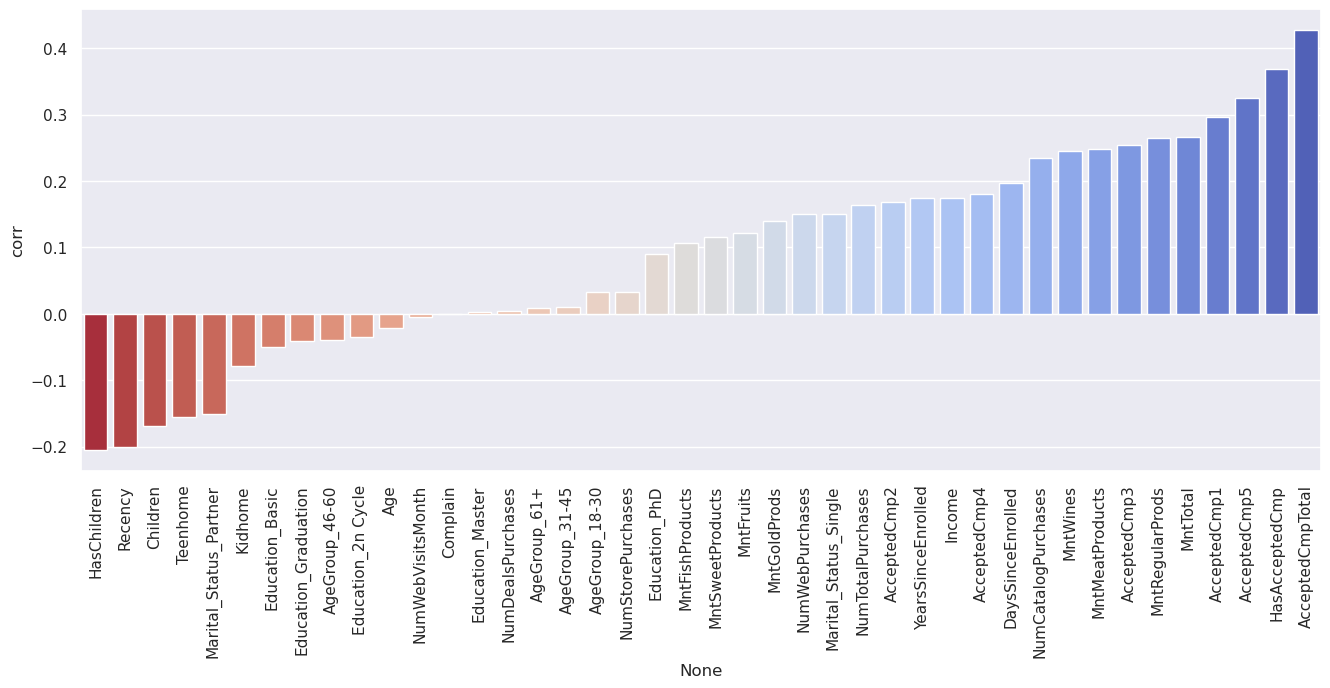

In [84]:
fig, ax = plt.subplots(figsize=(16, 6))

b = sns.barplot(x=response_corr.index, y=response_corr["corr"], palette="coolwarm_r")

b.tick_params(axis="x", rotation=90)

plt.show()

In [85]:
from matplotlib.colors import CenteredNorm, ListedColormap
from matplotlib.cm import ScalarMappable

cmap = "coolwarm_r"
cnorm = CenteredNorm(vcenter=0, halfrange=0.4)
smap = ScalarMappable(norm=cnorm, cmap=cmap)

listed_colors = ListedColormap([smap.to_rgba(x) for x in response_corr["corr"]]).colors

/tmp/ipykernel_5273/3574708529.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_corr.index, y=response_corr["corr"], palette=listed_colors)


<Axes: xlabel='None', ylabel='corr'>

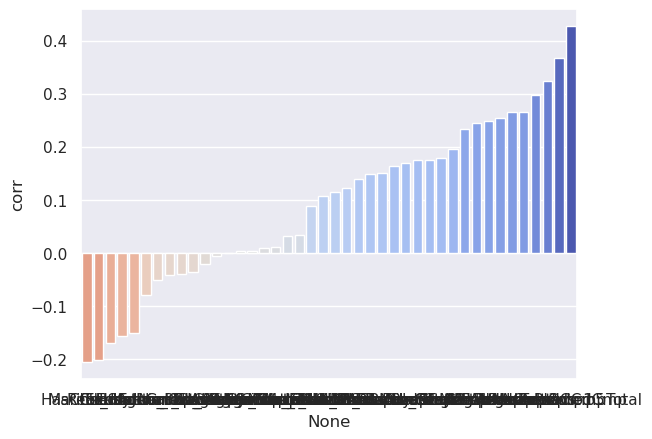

In [86]:
sns.barplot(x=response_corr.index, y=response_corr["corr"], palette=listed_colors)

/tmp/ipykernel_5273/1266949299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=response_corr.index, y=response_corr["corr"], palette=listed_colors)


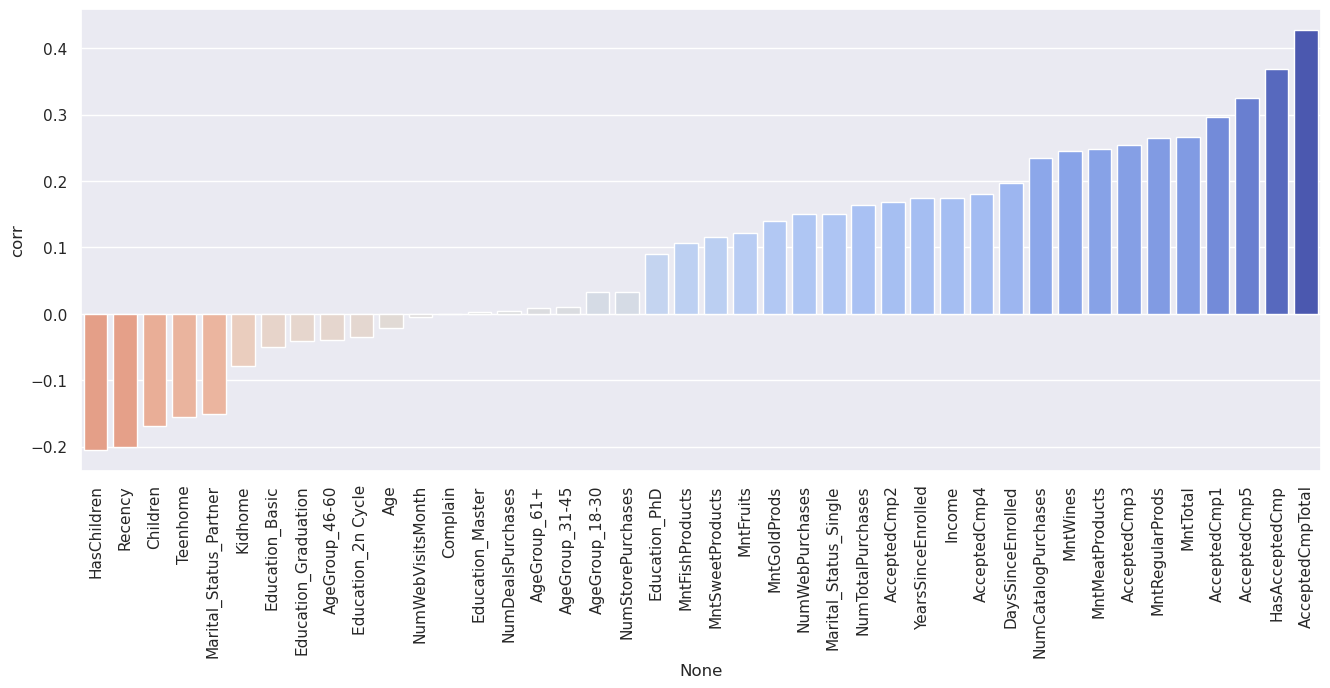

In [87]:
fig, ax = plt.subplots(figsize=(16, 6))

b = sns.barplot(x=response_corr.index, y=response_corr["corr"], palette=listed_colors)
b.tick_params(axis="x", rotation=90)
plt.show()

/tmp/ipykernel_5273/3502041476.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=response_corr.index, y=response_corr["corr"], palette=listed_colors, ax=ax)


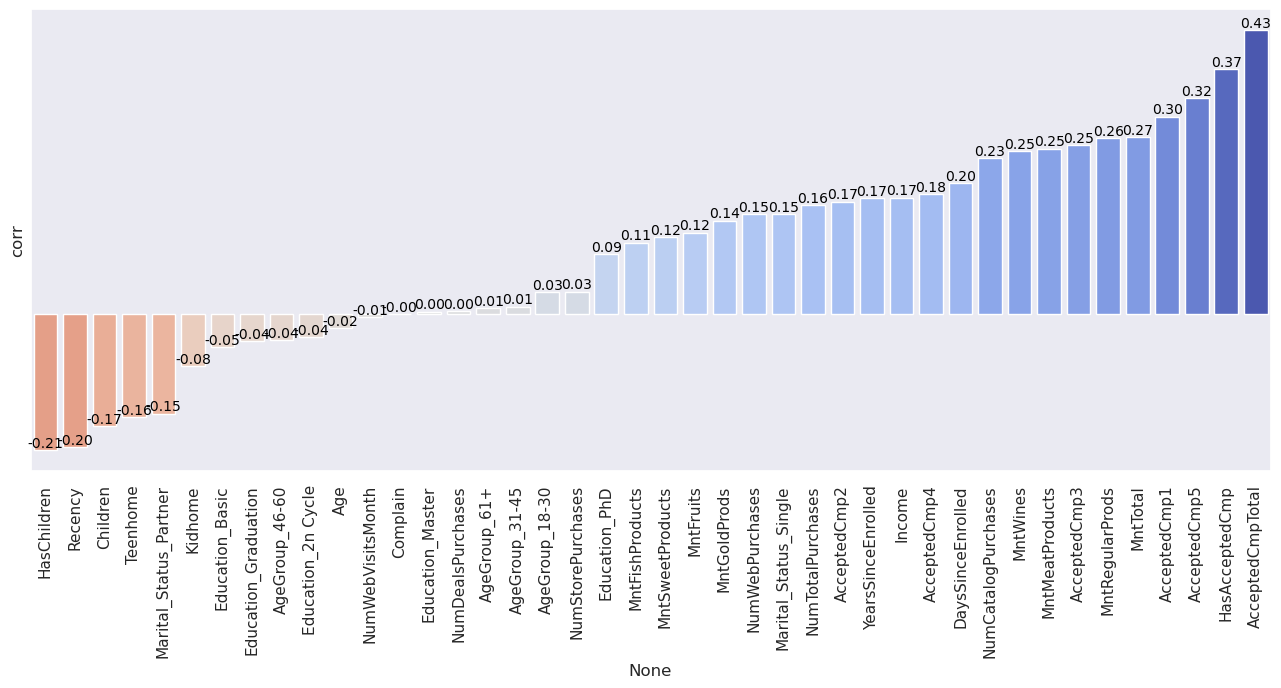

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tamanho da figura
fig, ax = plt.subplots(figsize=(16, 6))

# Criar o gráfico de barras
b = sns.barplot(x=response_corr.index, y=response_corr["corr"], palette=listed_colors, ax=ax)

# Rotacionar os rótulos do eixo x
b.tick_params(axis="x", rotation=90)

# Adicionar rótulo em cada barra
for p in b.patches:
    height = p.get_height()
    b.annotate(f"{height:.2f}",                # valor com 2 casas decimais
               (p.get_x() + p.get_width() / 2, height),  # posição: centro da barra
               ha='center', va='bottom', fontsize=10, color='black')

# Remover os valores do eixo Y
b.set_yticks([])

# Manter o nome do eixo Y
b.set_ylabel("corr")

# Exibir o gráfico
plt.show()